<div style="background-color:yellow">
<h1 style="font-size:40px; font-weight:bold; text-align:center;">MACHINE LEARNING ALGORITHM IMPLEMENTATION FROM SCRATCH</h1>
</div>


# All Machine Learning Algorithms in Python from Scratch with Visualizations

## Abstract:
This Python notebook serves as a comprehensive guide to implementing various machine learning algorithms from scratch using Python. In this notebook, we cover a wide range of machine learning concepts, including supervised and unsupervised learning algorithms, as well as techniques for data preprocessing, model evaluation, and visualization. Each algorithm is implemented step-by-step, providing insights into the underlying principles and algorithms' inner workings. Moreover, visualizations are incorporated to facilitate better understanding and intuition behind the algorithms. Whether you're a beginner looking to grasp the fundamentals of machine learning or an enthusiast aiming to deepen your understanding, this notebook offers a practical and hands-on approach to learning machine learning algorithms in Python.


## Index

### Regression
- Linear Regression
- Polynomial Regression
- Bayesian Linear Regression
- Support Vector Regression
- Gaussian Process Regression

### Classification
- Logistic Regression
- Decision Trees
- Random Forests
- Support Vector Machines
- Naive Bayes
- K-Nearest-Neighbors (KNN)
- Neural Networks

### Clustering
- K-Means Clustering
- Hierarchical Clustering Algorithm
- DBSCAN


<div style="background-color:yellow">
<h1 style="font-size:30px; font-weight:bold; text-align:center;">Regression</h1>
</div>


<mark>**Linear Regression**</mark>


**Abstract:**
This section delves into Linear Regression, a fundamental technique in predictive modeling. Linear regression aims to establish a linear relationship between independent and dependent variables. Here, we explore how to implement Linear Regression from scratch using Python. We start by understanding the theoretical underpinnings and then proceed with practical implementation steps.

**How to do it:**
1. Understand the concept of linear regression and its assumptions.
2. Prepare the dataset by splitting it into training and testing sets.
3. Implement the cost function and gradient descent algorithm.
4. Train the model on the training data.
5. Evaluate the model's performance using metrics like Mean Squared Error or R-squared.
6. Visualize the regression line and predictions.

**Conclusion:**
In conclusion, Linear Regression provides a simple yet powerful approach to modeling the relationship between variables. By following the steps outlined above, you can build a basic linear regression model from scratch and gain insights into how it operates. Understanding linear regression lays a solid foundation for more complex regression techniques and serves as a fundamental building block in the field of mach the next index.
 learning.




Coefficient of Determination (R^2): 0.9253717934621964


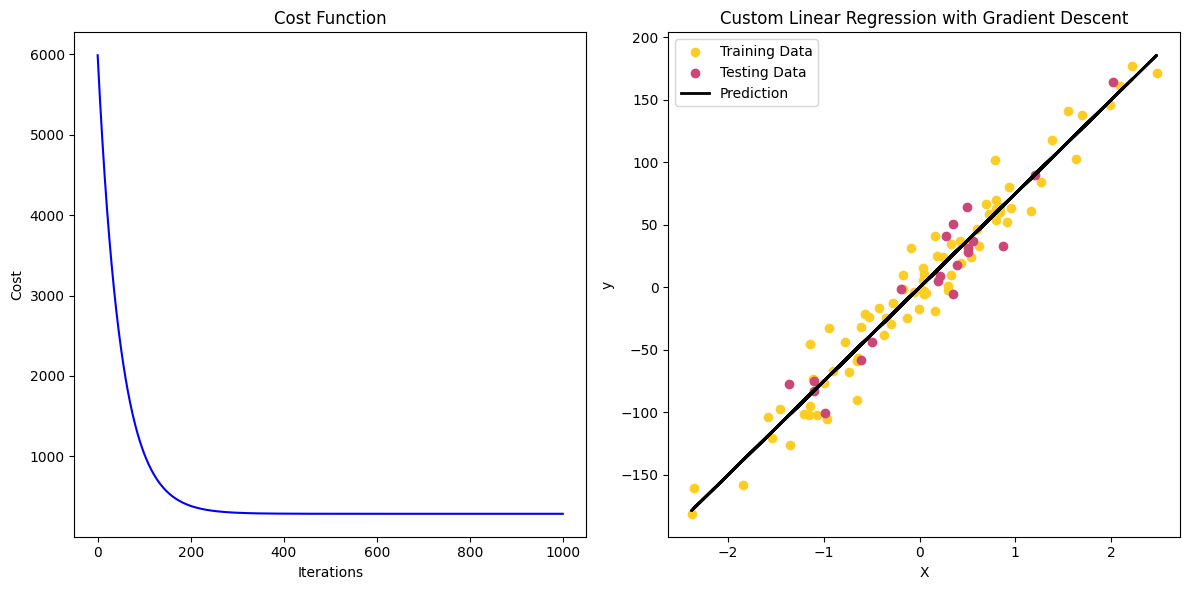

----------------------------------------
Predicted output for sample values:
Sample value: 1.5, Predicted output: 112.44278427900117
Sample value: -0.5, Predicted output: -37.67007083269214
----------------------------------------


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

def coefficient_of_determination(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

class CustomLinearRegression:
    def __init__(self, learning_rate=0.001, iterations=1000):
        self.lr = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            cost = np.mean((y_predicted - y) ** 2)
            self.cost_history.append(cost)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

custom_regressor = CustomLinearRegression(learning_rate=0.01, iterations=1000)
custom_regressor.fit(X_train, y_train)
predictions = custom_regressor.predict(X_test)
r_squared = coefficient_of_determination(y_test, predictions)
print("Coefficient of Determination (R^2):", r_squared)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(custom_regressor.iterations), custom_regressor.cost_history, color='blue')
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')

plt.subplot(1, 2, 2)
y_pred_line = custom_regressor.predict(X)
cmap = plt.get_cmap("plasma")
plt.scatter(X_train, y_train, color=cmap(0.9), label='Training Data')
plt.scatter(X_test, y_test, color=cmap(0.5), label='Testing Data')
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Custom Linear Regression with Gradient Descent')
plt.legend()

plt.tight_layout()
plt.show()

print("----------------------------------------")
sample_values = np.array([[1.5], [-0.5]])  
predicted_output = custom_regressor.predict(sample_values)
print("Predicted output for sample values:")
for i in range(len(sample_values)):
    print(f"Sample value: {sample_values[i][0]}, Predicted output: {predicted_output[i]}")
print("----------------------------------------")


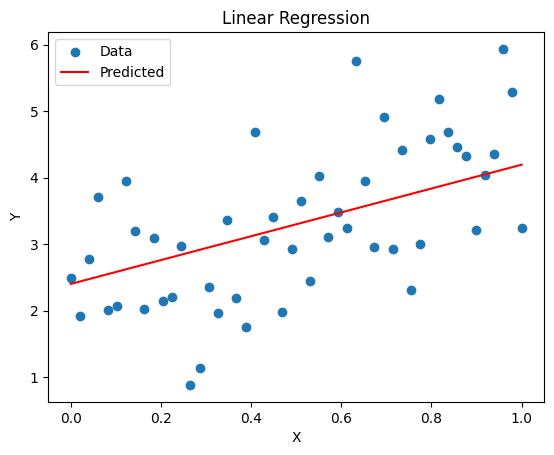

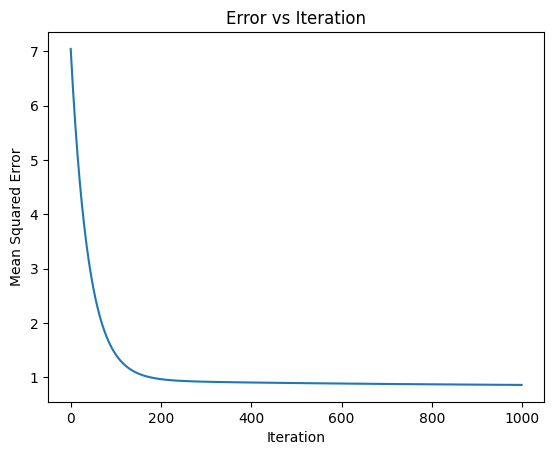

--------------------------------------------------
Sample Input:
X: [0.         0.02040816 0.04081633 0.06122449 0.08163265]
Y: [2.49671415 1.92296019 2.77013752 3.70670333 2.01074458]
--------------------------------------------------
Predictions:
m: 1.7927044809768449
b: 2.4011956630873192
--------------------------------------------------


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(size=50):
    np.random.seed(42)
    X = np.linspace(0, 1, size)
    Y = 3 * X + 2 + np.random.randn(size)
    return X, Y

def mean_squared_error(y, calculatedY):
    error = np.mean((y - calculatedY) ** 2)
    return error

def linear_regression(X, Y, max_iterations, learning_rate):
    m, b = np.random.rand(2)
    error_values = []
    for _ in range(max_iterations):
        predictedY = m * X + b
        error = mean_squared_error(Y, predictedY)
        error_values.append(error)
        m -= learning_rate * np.mean((predictedY - Y) * X)
        b -= learning_rate * np.mean(predictedY - Y)
    return m, b, error_values

def plot_results(X, Y, m, b, error_values):
    plt.scatter(X, Y, label='Data')
    plt.plot(X, m*X + b, color='red', label='Predicted')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()
    
    plt.plot(error_values)
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.title('Error vs Iteration')
    plt.show()

# Generate data
X, Y = generate_data()

# Train linear regression model
m, b, error_values = linear_regression(X, Y, max_iterations=1000, learning_rate=0.01)

# Plot results
plot_results(X, Y, m, b, error_values)

# Print sample input and predictions
print("-" * 50)
print("Sample Input:")
print("X:", X[:5])
print("Y:", Y[:5])
print("-" * 50)
print("Predictions:")
print("m:", m)
print("b:", b)
print("-" * 50)


<mark>**Polynomial Regression**</mark>

**Abstract:**
Polynomial Regression extends Linear Regression by fitting a polynomial function to the data. This section explores how to implement Polynomial Regression in Python, which is particularly useful when the relationship between variables is non-linear. We delve into the steps involved in building and evaluating a Polynomial Regression model.

**How to do it:**
1. Preprocess the data and handle missing values if any.
2. Choose the degree of the polynomial.
3. Transform the features into polynomial features.
4. Split the dataset into training and testing sets.
5. Fit the Polynomial Regression model to the training data.
6. Evaluate the model's performance using appropriate metrics.
7. Visualize the regression curve.

**Conclusion:**
Polynomial Regression offers a flexible approach for modeling non-linear relationships in data. By following the outlined steps, you can implement Polynomial Regression in Python and gain insights into capturing more complex patterns in your data. Experimenting with different polynomial degrees allows you to find the optimal model complexity for your dataset, thereby enhancing prediction accuracy.



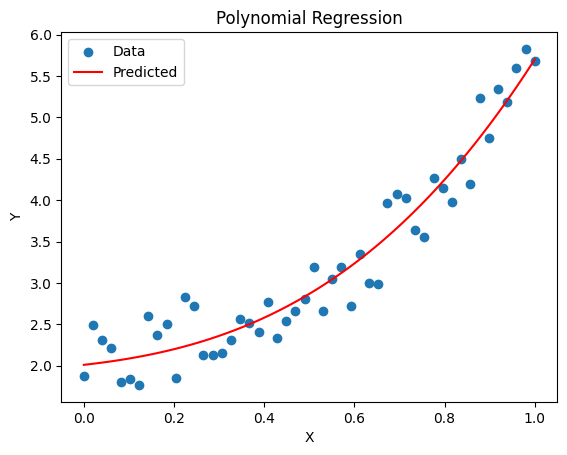

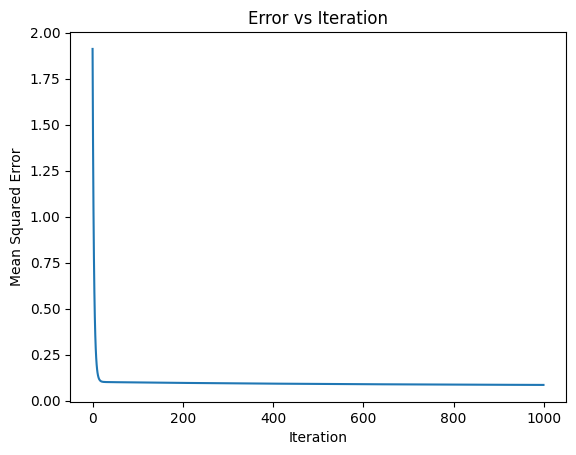

--------------------------------------------------
Sample Input:
X: [0.         0.02040816 0.04081633 0.06122449 0.08163265]
Y: [1.87454012 2.49032365 2.30896867 2.21100963 1.80201223]
--------------------------------------------------
Predictions:
p0: 2.0100056206860595
p1: 0.6050940855253598
p2: 1.3530816711427216
p3: 1.732559781324132
--------------------------------------------------


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(size=50):
    np.random.seed(42)
    X = np.linspace(0, 1, size)
    Y = 5*X**3 - 3*X**2 + 2*X + 2 + np.random.uniform(-0.5, 0.5, size)
    return X, Y

def mean_squared_error(y, calculatedY):
    error = np.mean((y - calculatedY) ** 2)
    return error

def polynomial_regression(X, Y, max_iterations, learning_rate, degree):
    parameters = np.random.rand(degree + 1)
    error_values = []
    for _ in range(max_iterations):
        calculatedY = np.zeros(len(Y))
        for i in range(degree + 1):
            calculatedY += parameters[i] * (X ** i)
        error = mean_squared_error(Y, calculatedY)
        error_values.append(error)
        derivatives = np.zeros(degree + 1)
        for d in range(degree + 1):
            if d == 0:
                derivatives[d] = (2 * np.sum(calculatedY - Y))
            else:
                xx = X ** d
                derivatives[d] = (2 * np.dot(xx, (calculatedY - Y)))
            parameters[d] -= derivatives[d] * learning_rate
    return parameters, error_values

def plot_results(X, Y, parameters, error_values):
    plt.scatter(X, Y, label='Data')
    x_values = np.linspace(0, 1, 100)
    y_values = np.zeros_like(x_values)
    for i, p in enumerate(parameters):
        y_values += p * (x_values ** i)
    plt.plot(x_values, y_values, color='red', label='Predicted')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Polynomial Regression')
    plt.legend()
    plt.show()
    
    plt.plot(error_values)
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.title('Error vs Iteration')
    plt.show()

X, Y = generate_data()

parameters, error_values = polynomial_regression(X, Y, max_iterations=1000, learning_rate=0.001, degree=3)

plot_results(X, Y, parameters, error_values)

print("-" * 50)
print("Sample Input:")
print("X:", X[:5])
print("Y:", Y[:5])
print("-" * 50)
print("Predictions:")
for i, p in enumerate(parameters):
    print(f"p{i}:", p)
print("-" * 50)


<mark>**Bayesian Linear Regression**</mark>

**Abstract:**
Bayesian Linear Regression is a probabilistic approach to regression that incorporates prior beliefs about the parameters. In this section, we explore how to implement Bayesian Linear Regression in Python, providing a probabilistic framework for modeling uncertainty in the regression coefficients.

**How to do it:**
1. Define prior distributions for regression coefficients.
2. Compute the posterior distribution using Bayes' theorem.
3. Sample from the posterior distribution to estimate regression parameters.
4. Predict new observations by integrating over the posterior distribution.
5. Evaluate model performance using appropriate metrics.

**Conclusion:**
Bayesian Linear Regression offers a principled approach to regression modeling by explicitly modeling uncertainty. By following the steps outlined above, you can implement Bayesian Linear Regression in Python and incorporate prior knowledge to make more informed predictions. This approach is particularly useful when dealing with limited data or when uncertainty in the model parameters needs to be quantified.



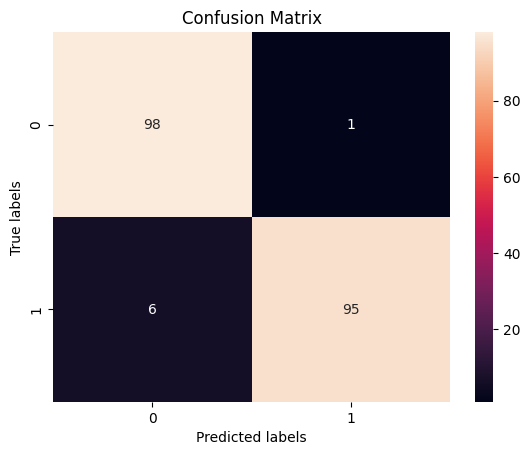

----------------------------------------
Sample input and predicted outcomes:
Sample input: [-1.18969436 -1.11808378 -0.94159977  0.50150002 -1.22473975  0.72849679
 -0.101836    1.14573172 -1.28687448  0.00287192]
Predicted outcome: 0
----------------------------------------
Sample input: [-0.12141952  0.93394528 -0.79099431  1.00046884 -1.66124991 -1.10631437
  1.01116419  0.9409656   0.20236666  0.13396693]
Predicted outcome: 1
----------------------------------------
Sample input: [ 0.52359715  0.52098609  0.16096703 -1.00084178  1.20856932 -2.3740229
 -1.15633947 -1.77990456 -1.80780202  0.21224739]
Predicted outcome: 0
----------------------------------------
Sample input: [-0.5476939  -0.15485798 -0.74690582  0.81087077 -1.42252322  0.0294769
  3.03787847 -1.24184974 -0.10547559  0.26665362]
Predicted outcome: 0
----------------------------------------
Sample input: [-0.19361578 -0.32426003 -0.44881347  0.27887171 -0.627264   -0.06349576
 -0.16672711 -0.41363324 -0.52512537 -0.4

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets

class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(classes)
    ax.yaxis.set_ticklabels(classes)
    plt.show()

# Testing
if __name__ == "__main__":
    X, y = datasets.make_classification(
        n_samples=1000, n_features=10, n_classes=2, random_state=123
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    nb = NaiveBayes()
    nb.fit(X_train, y_train)
    predictions = nb.predict(X_test)

    plot_confusion_matrix(y_test, predictions, classes=np.unique(y))

    print("----------------------------------------")
    print("Sample input and predicted outcomes:")
    for i in range(5):  
        print("Sample input:", X_test[i])
        print("Predicted outcome:", predictions[i])
        print("----------------------------------------")


#### Support Vector Regression
<mark>**Bayesian Linear Regression**</mark>

**Abstract:**
Support Vector Regression (SVR) is a regression technique that utilizes support vector machines to perform regression tasks. This section explores how to implement SVR in Python, leveraging the principles of Support Vector Machines to fit a regression model.

**How to do it:**
1. Preprocess the data and scale the features if necessary.
2. Choose appropriate kernel function and hyperparameters.
3. Train the SVR model using the training data.
4. Tune hyperparameters using cross-validation if needed.
5. Evaluate the model's performance using metrics such as Mean Squared Error.
6. Visualize the regression curve.

**Conclusion:**
Support Vector Regression offers a robust approach to regression tasks, particularly in scenarios with non-linear relationships or high-dimensional feature spaces. By following the outlined steps, you can implement SVR in Python and harness the power of Support Vector Machines for regression tasks. SVR provides flexibility in modeling complex relationships while offering robustness against overfitting.




[0.58977016 0.17946483] -0.1520000000000001


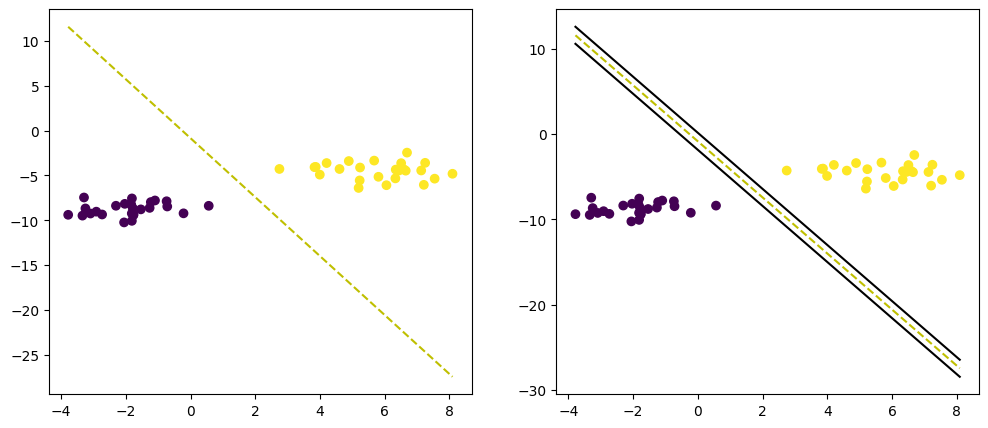

Sample 1 - Predicted: 1.0
Sample 2 - Predicted: 1.0
Sample 3 - Predicted: -1.0
Sample 4 - Predicted: 1.0
Sample 5 - Predicted: -1.0
Sample 6 - Predicted: -1.0
Sample 7 - Predicted: 1.0
Sample 8 - Predicted: -1.0
Sample 9 - Predicted: 1.0
Sample 10 - Predicted: -1.0
Sample 11 - Predicted: 1.0
Sample 12 - Predicted: 1.0
Sample 13 - Predicted: -1.0
Sample 14 - Predicted: 1.0
Sample 15 - Predicted: 1.0
Sample 16 - Predicted: 1.0
Sample 17 - Predicted: 1.0
Sample 18 - Predicted: 1.0
Sample 19 - Predicted: 1.0
Sample 20 - Predicted: 1.0
Sample 21 - Predicted: -1.0
Sample 22 - Predicted: -1.0
Sample 23 - Predicted: -1.0
Sample 24 - Predicted: -1.0
Sample 25 - Predicted: -1.0
Sample 26 - Predicted: -1.0
Sample 27 - Predicted: -1.0
Sample 28 - Predicted: -1.0
Sample 29 - Predicted: -1.0
Sample 30 - Predicted: -1.0
Sample 31 - Predicted: 1.0
Sample 32 - Predicted: 1.0
Sample 33 - Predicted: -1.0
Sample 34 - Predicted: -1.0
Sample 35 - Predicted: 1.0
Sample 36 - Predicted: -1.0
Sample 37 - Predic

In [10]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


if __name__ == "__main__":
    X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )
    y = np.where(y == 0, -1, 1)

    clf = SVM()
    clf.fit(X, y)

    print(clf.w, clf.b)

    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        ax[0].scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])
        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)
        ax[0].plot([x0_1, x0_2], [x1_1, x1_2], "y--")

        ax[1].scatter(X[:, 0], X[:, 1], marker="o", c=y)
        ax[1].plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax[1].plot([x0_1, x0_2], [x1_1 - 1, x1_2 - 1], "k")
        ax[1].plot([x0_1, x0_2], [x1_1 + 1, x1_2 + 1], "k")

        plt.show()

    visualize_svm()

    for i, (sample, label) in enumerate(zip(X, y)):
        print(f"Sample {i+1} - Predicted: {clf.predict([sample])[0]}")


[0.58977016 0.17946483] -0.1520000000000001


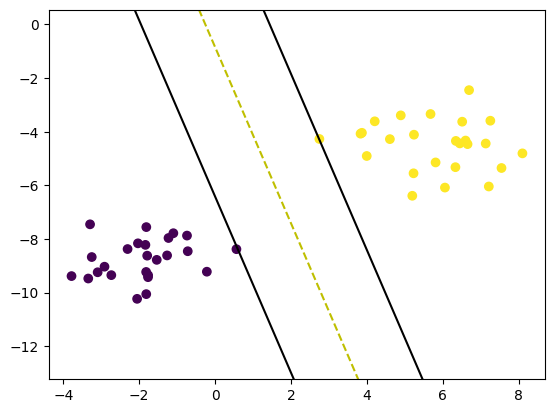

----------------------------------------
Sample input and predicted outcomes:
Sample input: [ 7.12731332 -4.4394424 ]
Predicted outcome: [1.]
----------------------------------------
Sample input: [ 6.68873898 -2.44840134]
Predicted outcome: [1.]
----------------------------------------
Sample input: [-1.1004791  -7.78436803]
Predicted outcome: [-1.]
----------------------------------------
Sample input: [ 3.99337867 -4.90451269]
Predicted outcome: [1.]
----------------------------------------
Sample input: [-1.8171622  -9.22909875]
Predicted outcome: [-1.]
----------------------------------------


In [9]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    import matplotlib.pyplot as plt

    X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )
    y = np.where(y == 0, -1, 1)

    clf = SVM()
    clf.fit(X, y)

    print(clf.w, clf.b)

    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

    visualize_svm()
    print("----------------------------------------")
    print("Sample input and predicted outcomes:")
    for i in range(5):  # Print predictions for first 5 samples
        print("Sample input:", X[i])
        print("Predicted outcome:", clf.predict([X[i]]))
        print("----------------------------------------")


#### Gaussian Process Regression
<mark>**Bayesian Linear Regression**</mark>

**Abstract:**
Gaussian Process Regression (GPR) is a non-parametric regression technique that models the target variable as a distribution over functions. In this section, we delve into how to implement Gaussian Process Regression in Python, offering a flexible and powerful framework for regression tasks.

**How to do it:**
1. Understand the concept of Gaussian Processes and covariance functions.
2. Choose a suitable kernel function to capture the underlying structure of the data.
3. Train the Gaussian Process Regression model using the training data.
4. Predict new observations and estimate the uncertainty using the posterior distribution.
5. Evaluate model performance using metrics such as Mean Squared Error or Log Likelihood.

**Conclusion:**
Gaussian Process Regression provides a principled approach to regression modeling, allowing for uncertainty estimation and flexibility in modeling complex relationships. By following the outlined steps, you can implement Gaussian Process Regression in Python and leverage its benefits for regression tasks. GPR is particularly useful in scenarios where the underlying data distribution is unknown or when uncertainty estimation is crucial.



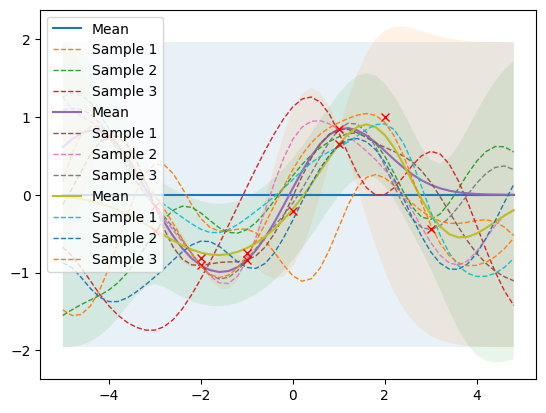

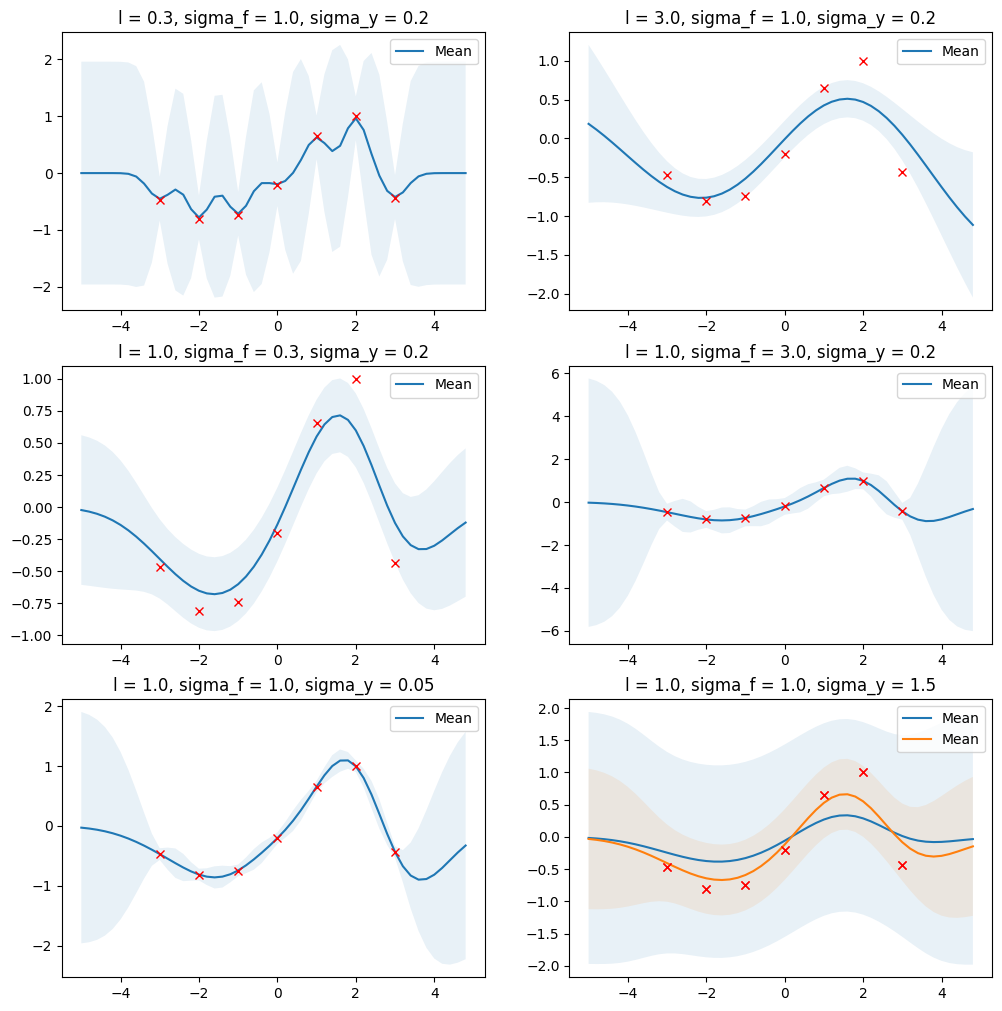

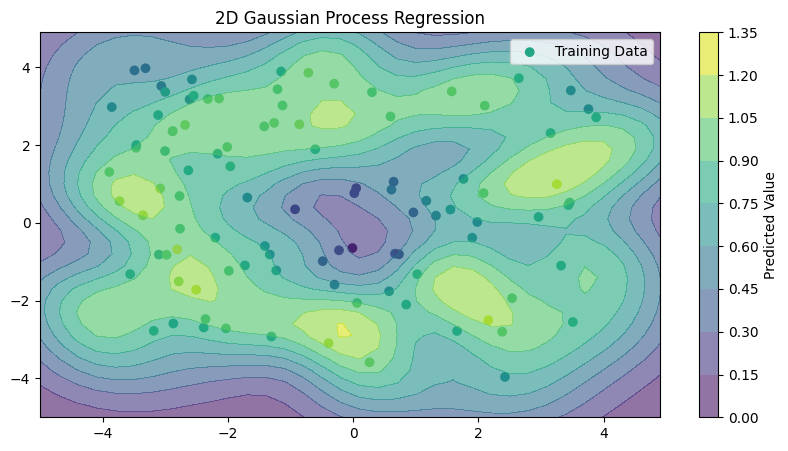

Sample Inputs and Predictions
------------------------------
Sample Inputs:
[[-5. ]
 [-4.8]
 [-4.6]
 [-4.4]
 [-4.2]]

Predictions:
[-0.0310513  -0.04493731 -0.06330318 -0.08686717 -0.11620472]
------------------------------


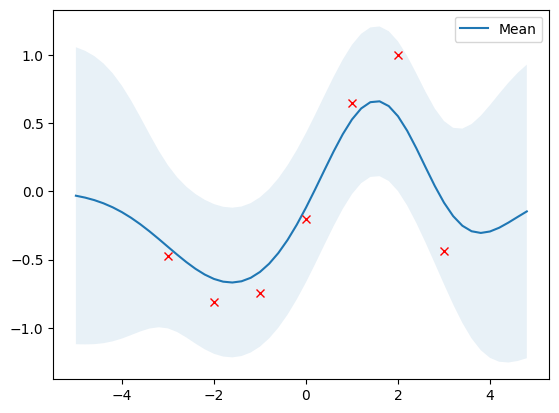

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import det, lstsq
from numpy.linalg import inv, cholesky
from scipy.optimize import minimize
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

def kernel(X1, X2, l=1.0, sigma_f=1.0):
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()

def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)
    
    mu_s = K_s.T.dot(K_inv).dot(Y_train)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    
    return mu_s, cov_s

def nll_fn(X_train, Y_train, noise, naive=True):
    def nll_naive(theta):
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + noise**2 * np.eye(len(X_train))
        return 0.5 * np.log(det(K)) + \
               0.5 * Y_train.T.dot(inv(K).dot(Y_train)) + \
               0.5 * len(X_train) * np.log(2*np.pi)

    def nll_stable(theta):
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + noise**2 * np.eye(len(X_train))
        L = cholesky(K)
        return np.sum(np.log(np.diagonal(L))) + \
               0.5 * Y_train.T.dot(lstsq(L.T, lstsq(L, Y_train)[0])[0]) + \
               0.5 * len(X_train) * np.log(2*np.pi)
    
    if naive:
        return nll_naive
    else:
        return nll_stable

X = np.arange(-5, 5, 0.2).reshape(-1, 1)
mu = np.zeros(X.shape)
cov = kernel(X, X)
samples = np.random.multivariate_normal(mu.ravel(), cov, 3)
plot_gp(mu, cov, X, samples=samples)

X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)
mu_s, cov_s = posterior_predictive(X, X_train, Y_train)
samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)

noise = 0.4
X_train = np.arange(-3, 4, 1).reshape(-1, 1)
Y_train = np.sin(X_train) + noise * np.random.randn(*X_train.shape)
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, sigma_y=noise)
samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)

params = [
    (0.3, 1.0, 0.2),
    (3.0, 1.0, 0.2),
    (1.0, 0.3, 0.2),
    (1.0, 3.0, 0.2),
    (1.0, 1.0, 0.05),
    (1.0, 1.0, 1.5),
]

plt.figure(figsize=(12, 5))

for i, (l, sigma_f, sigma_y) in enumerate(params):
    mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l, 
                                       sigma_f=sigma_f, 
                                       sigma_y=sigma_y)
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(top=2)
    plt.title(f'l = {l}, sigma_f = {sigma_f}, sigma_y = {sigma_y}')
    plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

res = minimize(nll_fn(X_train, Y_train, noise), [1, 1], 
               bounds=((1e-5, None), (1e-5, None)),
               method='L-BFGS-B')

l_opt, sigma_f_opt = res.x

mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l_opt, sigma_f=sigma_f_opt, sigma_y=noise)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

noise_2D = 0.1

rx, ry = np.arange(-5, 5, 0.3), np.arange(-5, 5, 0.3)
gx, gy = np.meshgrid(rx, ry)
X_2D = np.c_[gx.ravel(), gy.ravel()]

X_2D_train = np.random.uniform(-4, 4, (100, 2))
Y_2D_train = np.sin(0.5 * np.linalg.norm(X_2D_train, axis=1)) + \
             noise_2D * np.random.randn(len(X_2D_train))

mu_s, _ = posterior_predictive(X_2D, X_2D_train, Y_2D_train, sigma_y=noise_2D)
plt.figure(figsize=(10, 5))
plt.scatter(X_2D_train[:, 0], X_2D_train[:, 1], c=Y_2D_train, cmap='viridis', label='Training Data')
plt.contourf(gx, gy, mu_s.reshape(gx.shape), cmap='viridis', alpha=0.6)
plt.colorbar(label='Predicted Value')
plt.title(f'2D Gaussian Process Regression')
plt.legend()
plt.show()

rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=rbf, alpha=noise**2)
gpr.fit(X_train, Y_train)
mu_s, cov_s = gpr.predict(X, return_cov=True)
l = gpr.kernel_.k2.get_params()['length_scale']
sigma_f = np.sqrt(gpr.kernel_.k1.get_params()['constant_value'])
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

print("Sample Inputs and Predictions")
print("-" * 30)
print("Sample Inputs:")
print(X[:5])
print("\nPredictions:")
print(mu_s[:5])
print("-" * 30)

plt.show()


GP_regression.,value,constraints,priors
rbf.variance,0.31726614380524154,+ve,
rbf.lengthscale,1.086380345208781,+ve,
Gaussian_noise.variance,0.16000000000000003,+ve fixed,


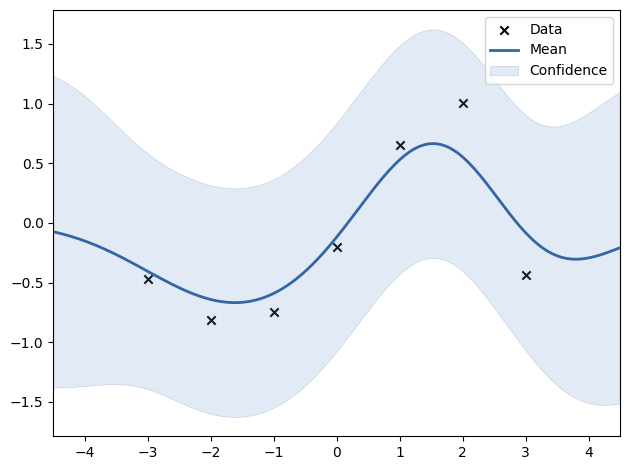

In [12]:

import GPy

rbf = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)
gpr = GPy.models.GPRegression(X_train, Y_train, rbf)

gpr.Gaussian_noise.variance = noise**2
gpr.Gaussian_noise.variance.fix()

gpr.optimize();

display(gpr)

l = gpr.rbf.lengthscale.values[0]
sigma_f = np.sqrt(gpr.rbf.variance.values[0])

assert(np.isclose(l_opt, l))
assert(np.isclose(sigma_f_opt, sigma_f))

gpr.plot();

<div style="background-color:yellow">
<h1 style="font-size:30px; font-weight:bold; text-align:center;">Classification</h1>
</div>


#### 
<mark>**Logistic Regression**</mark>

**Abstract:**
Logistic Regression is a fundamental classification algorithm that models the probability of a binary outcome. In this section, we explore how to implement Logistic Regression in Python, providing a simple yet effective approach to binary classification tasks.

**How to do it:**
1. Preprocess the data and handle categorical features if necessary.
2. Split the dataset into training and testing sets.
3. Implement the logistic function and cost function.
4. Train the Logistic Regression model using optimization techniques like Gradient Descent or Newton's Method.
5. Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score.
6. Visualize the decision boundary.

**Conclusion:**
Logistic Regression offers a straightforward approach to binary classification tasks and serves as a foundation for more complex algorithms. By following the outlined steps, you can implement Logistic Regression in Python and gain insights into probabilistic classification modeling. Logistic Regression is widely used in various fields, including healthcare, finance, and marketing, due to its interpretability and simplicity.



Total Loss: 0.028689916651484234
Accuracy: 0.99
----------------------------------------
Sample input and predicted outcomes:
Sample input: [-4.55760067 -2.67371685]
Predicted outcome: [False]
----------------------------------------
Sample input: [-4.1069672  -0.71293624]
Predicted outcome: [False]
----------------------------------------
Sample input: [-4.23029391 -3.86572943]
Predicted outcome: [False]
----------------------------------------
Sample input: [-3.25246409 -2.6646674 ]
Predicted outcome: [False]
----------------------------------------
Sample input: [-1.99824237 -1.6035325 ]
Predicted outcome: [False]
----------------------------------------


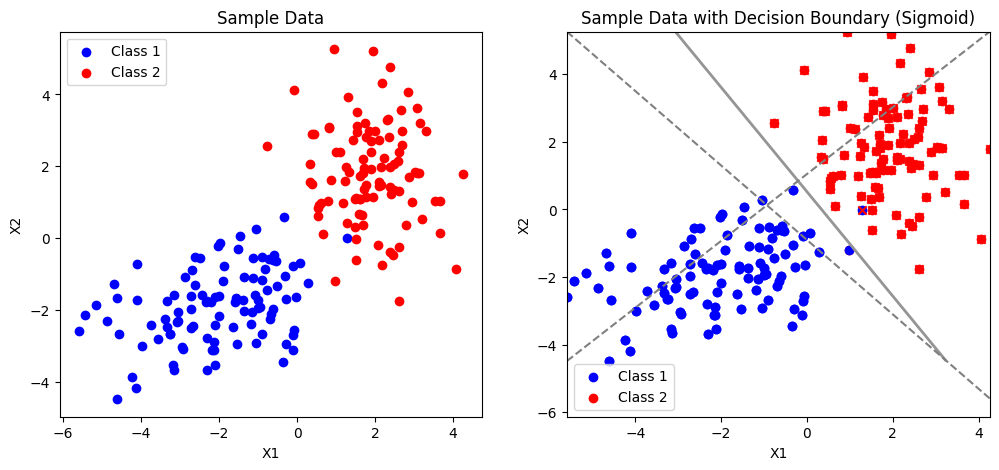

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
mean_class1 = [-2, -2]
cov_class1 = [[2, 0.5], [0.5, 1]]
class1_data = np.random.multivariate_normal(mean_class1, cov_class1, 100)

mean_class2 = [2, 2]
cov_class2 = [[1, 0], [0, 2]]
class2_data = np.random.multivariate_normal(mean_class2, cov_class2, 100)

X = np.vstack((class1_data, class2_data))
y = np.hstack((np.zeros(100), np.ones(100)))

class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.losses = []
        self.accuracies = []

    def __add_intercept(self, X):
        intercept = np.ones((len(X), 1)) 
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient

            if (i + 1) % 10000 == 0:
                self.losses.append(self.__loss(h, y))

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold

model = LogisticRegression(lr=0.1, num_iter=300000)
model.fit(X, y)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Sample Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Sample Data with Decision Boundary (Sigmoid)')
plt.legend()

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = model.predict_prob(grid).reshape(xx1.shape)

plt.contour(xx1, xx2, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=1, linewidths=2)

total_loss = model.losses[-1]
accuracy = (model.predict(X) == y).mean()
print(f"Total Loss: {total_loss}")
print(f"Accuracy: {accuracy}")

predictions = model.predict(X)
for i in range(len(X)):
    if predictions[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], color='blue', marker='o')
    else:
        plt.scatter(X[i, 0], X[i, 1], color='red', marker='x')
plt.plot([x1_min, x1_max], [x2_min, x2_max], linestyle='--', color='gray')
plt.plot([x1_min, x1_max], [x2_max, x1_min], linestyle='--', color='gray')

print("----------------------------------------")
print("Sample input and predicted outcomes:")
for i in range(5):  # Print predictions for first 5 samples
    print("Sample input:", X[i])
    print("Predicted outcome:", model.predict([X[i]]))
    print("----------------------------------------")

plt.show()


<mark>**Decision Trees**</mark>

**Abstract:**
Decision Trees are versatile machine learning algorithms used for both classification and regression tasks. This section explores how to implement Decision Trees in Python, offering an intuitive and interpretable approach to predictive modeling.

**How to do it:**
1. Preprocess the data and handle missing values or categorical features.
2. Choose an appropriate criterion (e.g., Gini impurity, entropy) for splitting nodes.
3. Train the Decision Tree model using the training data.
4. Visualize the trained decision tree for interpretability.
5. Evaluate the model's performance using metrics such as accuracy or Mean Squared Error.
6. Handle overfitting using techniques like pruning or setting maximum depth.

**Conclusion:**
Decision Trees provide a simple yet powerful approach to predictive modeling, offering interpretable decision rules. By following the outlined steps, you can implement Decision Trees in Python and gain insights into the decision-making process. Decision Trees are widely used in various domains due to their ease of interpretation and ability to handle both categorical and numerical data.




Decision Tree:


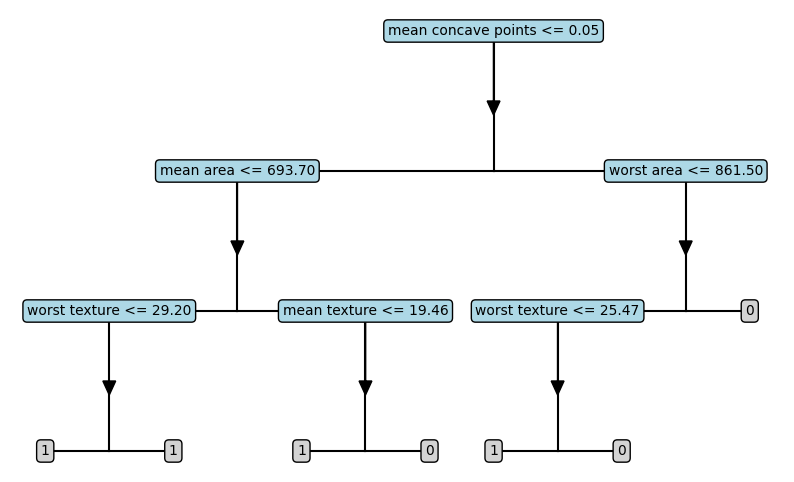


Accuracy: 0.9385964912280702
--------------------------------------------------
Sample Input and Predicted Outcomes:
Sample Input: [1.167e+01 2.002e+01 7.521e+01 4.162e+02 1.016e-01 9.453e-02 4.200e-02
 2.157e-02 1.859e-01 6.461e-02 2.067e-01 8.745e-01 1.393e+00 1.534e+01
 5.251e-03 1.727e-02 1.840e-02 5.298e-03 1.449e-02 2.671e-03 1.335e+01
 2.881e+01 8.700e+01 5.506e+02 1.550e-01 2.964e-01 2.758e-01 8.120e-02
 3.206e-01 8.950e-02]
Predicted Outcome: 1
--------------------------------------------------
Sample Input: [1.080e+01 9.710e+00 6.877e+01 3.576e+02 9.594e-02 5.736e-02 2.531e-02
 1.698e-02 1.381e-01 6.400e-02 1.728e-01 4.064e-01 1.126e+00 1.148e+01
 7.809e-03 9.816e-03 1.099e-02 5.344e-03 1.254e-02 2.120e-03 1.160e+01
 1.202e+01 7.366e+01 4.140e+02 1.436e-01 1.257e-01 1.047e-01 4.603e-02
 2.090e-01 7.699e-02]
Predicted Outcome: 1
--------------------------------------------------
Sample Input: [1.245e+01 1.641e+01 8.285e+01 4.767e+02 9.514e-02 1.511e-01 1.544e-01
 4.846e-02 2.

In [14]:
from collections import Counter
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = entropy(y)

        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def plot_tree(self, feature_names):
        fig, ax = plt.subplots(figsize=(10, 6))
        self._plot_node(ax, self.root, feature_names, x_offset=0, y_offset=0, spacing=50)
        ax.axis('off')
        plt.show()

    def _plot_node(self, ax, node, feature_names, x_offset=0, y_offset=0, spacing=50):
        if node.is_leaf_node():
            ax.text(x_offset, y_offset, str(node.value), ha='center', va='center',
                    bbox=dict(boxstyle='round', facecolor='lightgrey'))
            return

        feature_name = feature_names[node.feature]
        ax.text(x_offset, y_offset, f'{feature_name} <= {node.threshold:.2f}', ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='lightblue'))

        left_spacing = self._get_tree_width(node.left) * spacing / 2
        right_spacing = self._get_tree_width(node.right) * spacing / 2

        self._plot_node(ax, node.left, feature_names, x_offset - left_spacing, y_offset - spacing, spacing)
        self._plot_node(ax, node.right, feature_names, x_offset + right_spacing, y_offset - spacing, spacing)

        ax.plot([x_offset, x_offset], [y_offset, y_offset - spacing], c='black')
        ax.plot([x_offset, x_offset - left_spacing], [y_offset - spacing, y_offset - spacing], c='black')
        ax.plot([x_offset, x_offset + right_spacing], [y_offset - spacing, y_offset - spacing], c='black')
        ax.arrow(x_offset, y_offset, 0, -spacing/2, head_width=5, head_length=5, fc='k', ec='k')

    def _get_tree_width(self, node):
        if node.is_leaf_node():
            return 1
        return self._get_tree_width(node.left) + self._get_tree_width(node.right)

if __name__ == "__main__":
    data = datasets.load_breast_cancer()
    X, y = data.data, data.target
    feature_names = data.feature_names

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    clf = DecisionTree(max_depth=3)
    clf.fit(X_train, y_train)

    print("Decision Tree:")
    clf.plot_tree(feature_names)

    y_pred = clf.predict(X_test)
    acc = np.sum(y_test == y_pred) / len(y_test)
    print("\nAccuracy:", acc)

    print("-" * 50)
    print("Sample Input and Predicted Outcomes:")
    for i in range(5):  
        sample_input = X_test[i]
        predicted_outcome = clf.predict([sample_input])[0]
        print("Sample Input:", sample_input)
        print("Predicted Outcome:", predicted_outcome)
        print("-" * 50)


In [17]:
from collections import Counter
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = entropy(y)

        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def print_tree(self, node=None, depth=0):
        if node is None:
            node = self.root

        if node.is_leaf_node():
            print(" " * depth * 2, "Predict:", node.value)
            return

        print(" " * depth * 2, f"Feature {node.feature} <= {node.threshold}")
        print(" " * depth * 2, "--> True:")
        self.print_tree(node.left, depth + 1)
        print(" " * depth * 2, "--> False:")
        self.print_tree(node.right, depth + 1)

if __name__ == "__main__":
    data = datasets.load_breast_cancer()
    X, y = data.data, data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    clf = DecisionTree(max_depth=3)
    clf.fit(X_train, y_train)

    print("Decision Tree:")
    clf.print_tree()

    y_pred = clf.predict(X_test)
    acc = np.sum(y_test == y_pred) / len(y_test)
    print("\nAccuracy:", acc)

    print("-" * 50)
    print("Sample Input and Predicted Outcomes:")
    for i in range(5): 
        sample_input = X_test[i]
        predicted_outcome = clf.predict([sample_input])[0]
        print("Sample Input:", sample_input)
        print("Predicted Outcome:", predicted_outcome)
        print("-" * 50)


Decision Tree:
 Feature 7 <= 0.05102
 --> True:
   Feature 20 <= 16.77
   --> True:
     Feature 13 <= 34.37
     --> True:
       Predict: 1
     --> False:
       Predict: 1
   --> False:
     Feature 1 <= 19.46
     --> True:
       Predict: 1
     --> False:
       Predict: 0
 --> False:
   Feature 23 <= 861.5
   --> True:
     Feature 21 <= 25.47
     --> True:
       Predict: 1
     --> False:
       Predict: 0
   --> False:
     Predict: 0

Accuracy: 0.956140350877193
--------------------------------------------------
Sample Input and Predicted Outcomes:
Sample Input: [1.167e+01 2.002e+01 7.521e+01 4.162e+02 1.016e-01 9.453e-02 4.200e-02
 2.157e-02 1.859e-01 6.461e-02 2.067e-01 8.745e-01 1.393e+00 1.534e+01
 5.251e-03 1.727e-02 1.840e-02 5.298e-03 1.449e-02 2.671e-03 1.335e+01
 2.881e+01 8.700e+01 5.506e+02 1.550e-01 2.964e-01 2.758e-01 8.120e-02
 3.206e-01 8.950e-02]
Predicted Outcome: 1
--------------------------------------------------
Sample Input: [1.080e+01 9.710e+00 6.877

<mark>**Random Forests**</mark>

**Abstract:**
Random Forests is an ensemble learning method that constructs multiple decision trees and combines their predictions to improve accuracy and robustness. In this section, we explore how to implement Random Forests in Python, offering a powerful and versatile approach to classification and regression tasks.

**How to do it:**
1. Preprocess the data and handle missing values or categorical features.
2. Choose hyperparameters such as the number of trees and maximum depth.
3. Train the Random Forest model using the training data.
4. Evaluate the model's performance using metrics such as accuracy or Mean Squared Error.
5. Analyze feature importance to gain insights into the dataset.
6. Handle overfitting by tuning hyperparameters or using techniques like bagging.

**Conclusion:**
Random Forests offer a robust and scalable solution to predictive modeling tasks, combining the strengths of multiple decision trees. By following the outlined steps, you can implement Random Forests in Python and harness the benefits of ensemble learning. Random Forests are widely used in practice due to their high performance, flexibility, and ability to handle large datasets.



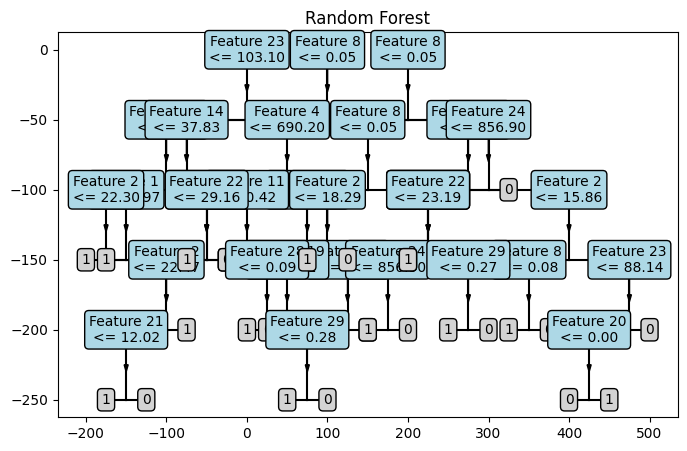

--------------------------------------------------
Sample Input: [1.167e+01 2.002e+01 7.521e+01 4.162e+02 1.016e-01 9.453e-02 4.200e-02
 2.157e-02 1.859e-01 6.461e-02 2.067e-01 8.745e-01 1.393e+00 1.534e+01
 5.251e-03 1.727e-02 1.840e-02 5.298e-03 1.449e-02 2.671e-03 1.335e+01
 2.881e+01 8.700e+01 5.506e+02 1.550e-01 2.964e-01 2.758e-01 8.120e-02
 3.206e-01 8.950e-02]
Predicted Outcome: 1
--------------------------------------------------


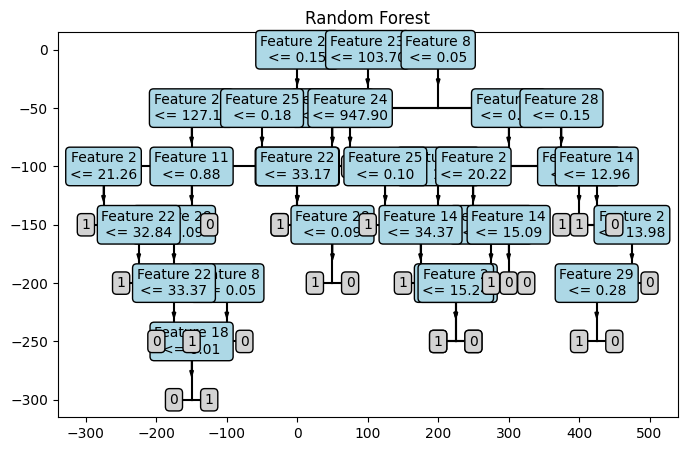

--------------------------------------------------
Sample Input: [1.167e+01 2.002e+01 7.521e+01 4.162e+02 1.016e-01 9.453e-02 4.200e-02
 2.157e-02 1.859e-01 6.461e-02 2.067e-01 8.745e-01 1.393e+00 1.534e+01
 5.251e-03 1.727e-02 1.840e-02 5.298e-03 1.449e-02 2.671e-03 1.335e+01
 2.881e+01 8.700e+01 5.506e+02 1.550e-01 2.964e-01 2.758e-01 8.120e-02
 3.206e-01 8.950e-02]
Predicted Outcome: 1
--------------------------------------------------


In [19]:
from collections import Counter
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = entropy(y)

        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def plot_tree(self, feature_names, tree_index):
        fig, ax = plt.subplots(figsize=(8, 5))
        self._plot_node(ax, self.root, feature_names, x_offset=0, y_offset=0, spacing=50)
        ax.set_title(f"Decision Tree {tree_index + 1}")
        plt.show()

    def _plot_node(self, ax, node, feature_names, x_offset=0, y_offset=0, spacing=50):
        if node.is_leaf_node():
            ax.text(x_offset, y_offset, str(node.value), ha='center', va='center',
                    bbox=dict(boxstyle='round', facecolor='lightgrey'))
            return

        feature_name = feature_names[node.feature]
        ax.text(x_offset, y_offset, f'{feature_name} <= {node.threshold:.2f}', ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='lightblue'))

        left_spacing = self._get_tree_width(node.left) * spacing / 2
        right_spacing = self._get_tree_width(node.right) * spacing / 2

        self._plot_node(ax, node.left, feature_names, x_offset - left_spacing, y_offset - spacing, spacing)
        self._plot_node(ax, node.right, feature_names, x_offset + right_spacing, y_offset - spacing, spacing)

        ax.plot([x_offset - left_spacing, x_offset + right_spacing], [y_offset - spacing, y_offset - spacing], c='black')
        ax.arrow(x_offset, y_offset, 0, -spacing/2, head_width=5, head_length=5, fc='k', ec='k')

    def _get_tree_width(self, node):
        if node.is_leaf_node():
            return 1
        return self._get_tree_width(node.left) + self._get_tree_width(node.right)


def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]


def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common


class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for i in range(self.n_trees):
            tree = DecisionTree(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                n_feats=self.n_feats,
            )
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

        # Plot the random forest
        self.plot_forest(X, y)

    def plot_forest(self, X, y):
        fig, ax = plt.subplots(figsize=(8, 5))
        for i, tree in enumerate(self.trees):
            ax = self._plot_node(ax, tree.root, x_offset=100*i, y_offset=0, spacing=50)
        ax.set_title("Random Forest")
        plt.show()

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

    from collections import Counter
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = entropy(y)

        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def plot_tree(self, feature_names, tree_index):
        fig, ax = plt.subplots(figsize=(8, 5))
        self._plot_node(ax, self.root, feature_names, x_offset=0, y_offset=0, spacing=50)
        ax.set_title(f"Decision Tree {tree_index + 1}")
        plt.show()

    def _plot_node(self, ax, node, feature_names, x_offset=0, y_offset=0, spacing=50):
        if node.is_leaf_node():
            ax.text(x_offset, y_offset, str(node.value), ha='center', va='center',
                    bbox=dict(boxstyle='round', facecolor='lightgrey'))
            return

        feature_name = feature_names[node.feature]
        ax.text(x_offset, y_offset, f'{feature_name} <= {node.threshold:.2f}', ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='lightblue'))

        left_spacing = self._get_tree_width(node.left) * spacing / 2
        right_spacing = self._get_tree_width(node.right) * spacing / 2

        self._plot_node(ax, node.left, feature_names, x_offset - left_spacing, y_offset - spacing, spacing)
        self._plot_node(ax, node.right, feature_names, x_offset + right_spacing, y_offset - spacing, spacing)

        ax.plot([x_offset, x_offset], [y_offset, y_offset - spacing], c='black')
        ax.plot([x_offset, x_offset - left_spacing], [y_offset - spacing, y_offset - spacing], c='black')
        ax.plot([x_offset, x_offset + right_spacing], [y_offset - spacing, y_offset - spacing], c='black')
        ax.arrow(x_offset, y_offset, 0, -spacing/2, head_width=5, head_length=5, fc='k', ec='k')

    def _get_tree_width(self, node):
        if node.is_leaf_node():
            return 1
        return self._get_tree_width(node.left) + self._get_tree_width(node.right)


def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]


def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common


class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for i in range(self.n_trees):
            tree = DecisionTree(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                n_feats=self.n_feats,
            )
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

        # Plot the random forest
        self.plot_forest(X, y)

    def plot_forest(self, X, y):
        fig, ax = plt.subplots(figsize=(8, 5))
        for i, tree in enumerate(self.trees):
            ax = self._plot_node(ax, tree.root, tree_index=i)
        ax.set_title("Random Forest")
        plt.show()

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

    def _plot_node(self, ax, node, tree_index):
        x_offset = 100 * tree_index
        self._plot_node_recursive(ax, node, x_offset=x_offset, y_offset=0, spacing=50)
        return ax

    def _plot_node_recursive(self, ax, node, x_offset=0, y_offset=0, spacing=50):
        if node.is_leaf_node():
            ax.text(x_offset, y_offset, str(node.value), ha='center', va='center',
                    bbox=dict(boxstyle='round', facecolor='lightgrey'))
            return

        ax.text(x_offset, y_offset, f'Feature {node.feature + 1}\n<= {node.threshold:.2f}', ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='lightblue'))

        left_spacing = self._get_tree_width(node.left) * spacing / 2
        right_spacing = self._get_tree_width(node.right) * spacing / 2

        self._plot_node_recursive(ax, node.left, x_offset - left_spacing, y_offset - spacing, spacing)
        self._plot_node_recursive(ax, node.right, x_offset + right_spacing, y_offset - spacing, spacing)

        ax.plot([x_offset, x_offset], [y_offset, y_offset - spacing], c='black')
        ax.plot([x_offset, x_offset - left_spacing], [y_offset - spacing, y_offset - spacing], c='black')
        ax.plot([x_offset, x_offset + right_spacing], [y_offset - spacing, y_offset - spacing], c='black')
        ax.arrow(x_offset, y_offset, 0, -spacing/2, head_width=5, head_length=5, fc='k', ec='k')

    def _get_tree_width(self, node):
        if node.is_leaf_node():
            return 1
        return self._get_tree_width(node.left) + self._get_tree_width(node.right)


# Testing
if __name__ == "__main__":
    data = datasets.load_breast_cancer()
    X = data.data
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    clf = RandomForest(n_trees=3, max_depth=10)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("-" * 50)
    print("Sample Input:", X_test[0])
    print("Predicted Outcome:", y_pred[0])
    print("-" * 50)


    def _get_tree_width(self, node):
        if node.is_leaf_node():
            return 1
        return self._get_tree_width(node.left) + self._get_tree_width(node.right)


# Testing
if __name__ == "__main__":
    data = datasets.load_breast_cancer()
    X = data.data
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    clf = RandomForest(n_trees=3, max_depth=10)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("-" * 50)
    print("Sample Input:", X_test[0])
    print("Predicted Outcome:", y_pred[0])
    print("-" * 50)


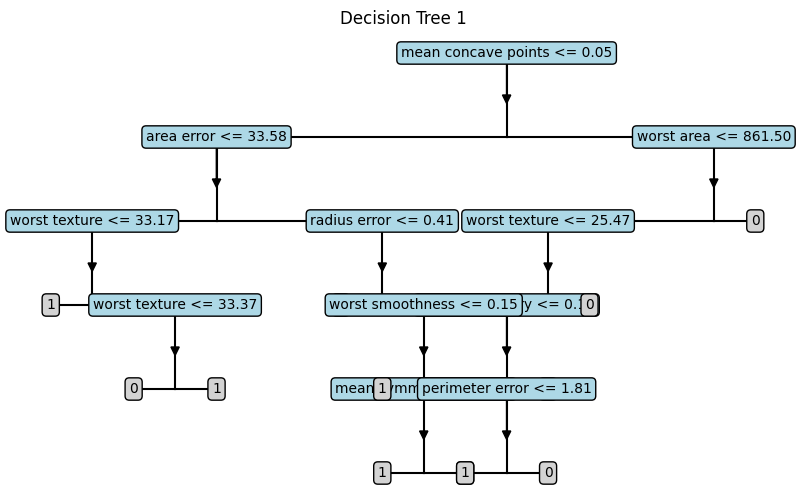

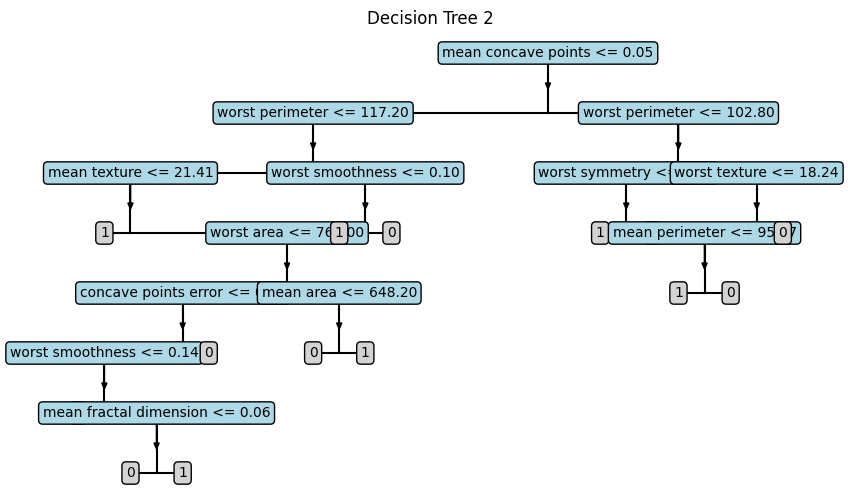

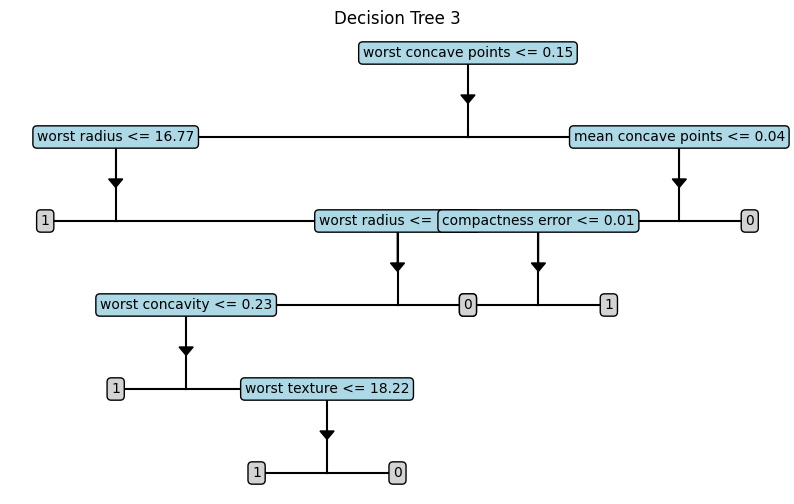

--------------------------------------------------
Sample Input: [1.167e+01 2.002e+01 7.521e+01 4.162e+02 1.016e-01 9.453e-02 4.200e-02
 2.157e-02 1.859e-01 6.461e-02 2.067e-01 8.745e-01 1.393e+00 1.534e+01
 5.251e-03 1.727e-02 1.840e-02 5.298e-03 1.449e-02 2.671e-03 1.335e+01
 2.881e+01 8.700e+01 5.506e+02 1.550e-01 2.964e-01 2.758e-01 8.120e-02
 3.206e-01 8.950e-02]
Predicted Outcome: 1
--------------------------------------------------


In [18]:
from collections import Counter
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = entropy(y)

        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def plot_tree(self, feature_names, tree_index):
        fig, ax = plt.subplots(figsize=(10, 6))
        self._plot_node(ax, self.root, feature_names, x_offset=0, y_offset=0, spacing=50)
        ax.axis('off')
        plt.title(f"Decision Tree {tree_index + 1}")
        plt.show()

    def _plot_node(self, ax, node, feature_names, x_offset=0, y_offset=0, spacing=50):
        if node.is_leaf_node():
            ax.text(x_offset, y_offset, str(node.value), ha='center', va='center',
                    bbox=dict(boxstyle='round', facecolor='lightgrey'))
            return

        feature_name = feature_names[node.feature]
        ax.text(x_offset, y_offset, f'{feature_name} <= {node.threshold:.2f}', ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='lightblue'))

        left_spacing = self._get_tree_width(node.left) * spacing / 2
        right_spacing = self._get_tree_width(node.right) * spacing / 2

        self._plot_node(ax, node.left, feature_names, x_offset - left_spacing, y_offset - spacing, spacing)
        self._plot_node(ax, node.right, feature_names, x_offset + right_spacing, y_offset - spacing, spacing)

        ax.plot([x_offset, x_offset], [y_offset, y_offset - spacing], c='black')
        ax.plot([x_offset, x_offset - left_spacing], [y_offset - spacing, y_offset - spacing], c='black')
        ax.plot([x_offset, x_offset + right_spacing], [y_offset - spacing, y_offset - spacing], c='black')
        ax.arrow(x_offset, y_offset, 0, -spacing/2, head_width=5, head_length=5, fc='k', ec='k')

    def _get_tree_width(self, node):
        if node.is_leaf_node():
            return 1
        return self._get_tree_width(node.left) + self._get_tree_width(node.right)


def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]


def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common


class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for i in range(self.n_trees):
            tree = DecisionTree(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                n_feats=self.n_feats,
            )
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)
            tree.plot_tree(data.feature_names, i)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)


# Testing
if __name__ == "__main__":
    data = datasets.load_breast_cancer()
    X = data.data
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    clf = RandomForest(n_trees=3, max_depth=10)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("-" * 50)
    print("Sample Input:", X_test[0])
    print("Predicted Outcome:", y_pred[0])
    print("-" * 50)


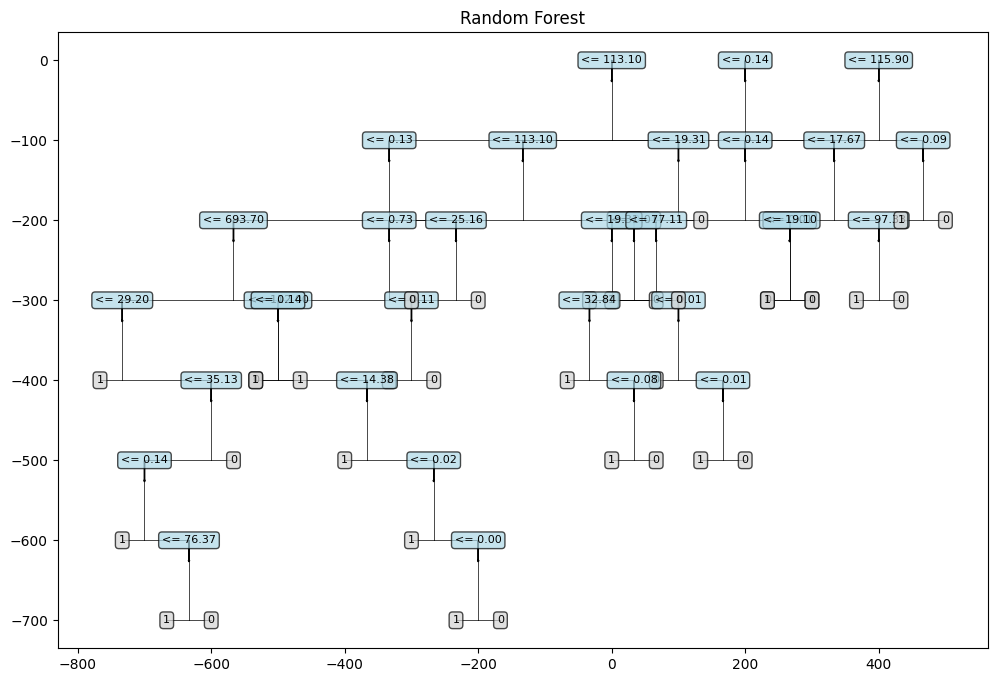

--------------------------------------------------
Sample Input: [1.167e+01 2.002e+01 7.521e+01 4.162e+02 1.016e-01 9.453e-02 4.200e-02
 2.157e-02 1.859e-01 6.461e-02 2.067e-01 8.745e-01 1.393e+00 1.534e+01
 5.251e-03 1.727e-02 1.840e-02 5.298e-03 1.449e-02 2.671e-03 1.335e+01
 2.881e+01 8.700e+01 5.506e+02 1.550e-01 2.964e-01 2.758e-01 8.120e-02
 3.206e-01 8.950e-02]
Predicted Outcome: 1
--------------------------------------------------


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split

def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = entropy(y)

        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for i in range(self.n_trees):
            tree = DecisionTree(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                n_feats=self.n_feats,
            )
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

        # Plot the random forest
        self.plot_forest(X, y)

    def plot_forest(self, X, y):
        fig, ax = plt.subplots(figsize=(12, 8))
        for i, tree in enumerate(self.trees):
            ax = self._plot_node(ax, tree.root, tree_index=i)
        ax.set_title("Random Forest")
        plt.show()

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

    def _plot_node(self, ax, node, tree_index):
        x_offset = 200 * tree_index
        self._plot_node_recursive(ax, node, x_offset=x_offset, y_offset=0, spacing=100)
        return ax

    def _plot_node_recursive(self, ax, node, x_offset=0, y_offset=0, spacing=100):
        if node.is_leaf_node():
            ax.text(x_offset, y_offset, str(node.value), ha='center', va='center',
                    bbox=dict(boxstyle='round', facecolor='lightgrey', alpha=0.7), fontsize=8)
            return

        ax.text(x_offset, y_offset, f'<= {node.threshold:.2f}', ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7), fontsize=8)

        left_spacing = self._get_tree_width(node.left) * spacing / 3
        right_spacing = self._get_tree_width(node.right) * spacing / 3

        self._plot_node_recursive(ax, node.left, x_offset - left_spacing, y_offset - spacing, spacing)
        self._plot_node_recursive(ax, node.right, x_offset + right_spacing, y_offset - spacing, spacing)

        ax.plot([x_offset, x_offset], [y_offset, y_offset - spacing], c='black', linewidth=0.5)
        ax.plot([x_offset, x_offset - left_spacing], [y_offset - spacing, y_offset - spacing], c='black', linewidth=0.5)
        ax.plot([x_offset, x_offset + right_spacing], [y_offset - spacing, y_offset - spacing], c='black', linewidth=0.5)
        ax.arrow(x_offset, y_offset, 0, -spacing/4, head_width=2, head_length=2, fc='k', ec='k')

    def _get_tree_width(self, node):
        if node.is_leaf_node():
            return 1
        return self._get_tree_width(node.left) + self._get_tree_width(node.right)

def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]

def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

if __name__ == "__main__":
    data = datasets.load_breast_cancer()
    X = data.data
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    clf = RandomForest(n_trees=3, max_depth=10)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("-" * 50)
    print("Sample Input:", X_test[0])
    print("Predicted Outcome:", y_pred[0])
    print("-" * 50)


<mark>**Support Vector Machines**</mark>

**Abstract:**
Support Vector Machines (SVMs) are powerful supervised learning models used for classification and regression tasks. This section explores how to implement Support Vector Machines in Python, providing a flexible and effective approach to pattern recognition and regression analysis.

**How to do it:**
1. Preprocess the data and scale the features if necessary.
2. Choose an appropriate kernel function (e.g., linear, polynomial, radial basis function).
3. Select hyperparameters such as the regularization parameter (C) and kernel parameters.
4. Train the SVM model using the training data.
5. Evaluate the model's performance using metrics such as accuracy or Mean Squared Error.
6. Visualize the decision boundary for binary classification tasks.

**Conclusion:**
Support Vector Machines offer a versatile and powerful framework for solving classification and regression problems. By following the outlined steps, you can implement Support Vector Machines in Python and leverage their benefits for various machine learning tasks. SVMs are widely used in practice due to their ability to handle high-dimensional data and nonlinear relationships.




[0.58977016 0.17946483] -0.1520000000000001


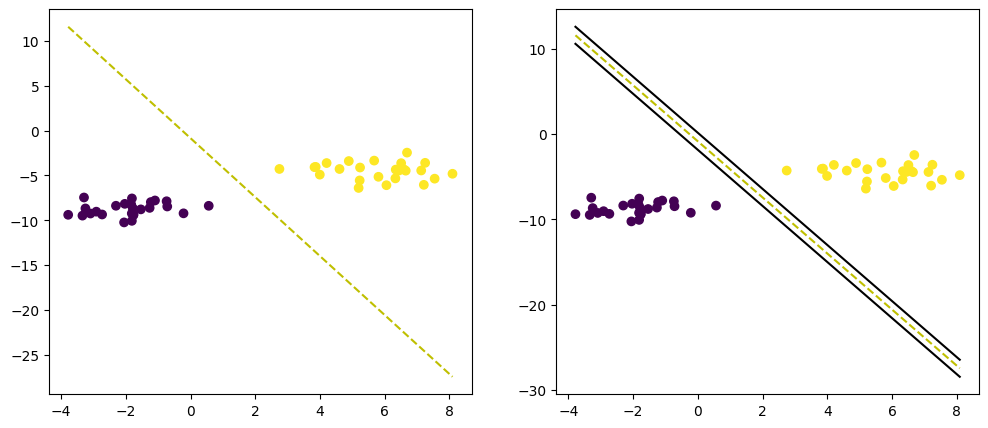

Sample 1 - Predicted: 1.0
Sample 2 - Predicted: 1.0
Sample 3 - Predicted: -1.0
Sample 4 - Predicted: 1.0
Sample 5 - Predicted: -1.0
Sample 6 - Predicted: -1.0
Sample 7 - Predicted: 1.0
Sample 8 - Predicted: -1.0
Sample 9 - Predicted: 1.0
Sample 10 - Predicted: -1.0
Sample 11 - Predicted: 1.0
Sample 12 - Predicted: 1.0
Sample 13 - Predicted: -1.0
Sample 14 - Predicted: 1.0
Sample 15 - Predicted: 1.0
Sample 16 - Predicted: 1.0
Sample 17 - Predicted: 1.0
Sample 18 - Predicted: 1.0
Sample 19 - Predicted: 1.0
Sample 20 - Predicted: 1.0
Sample 21 - Predicted: -1.0
Sample 22 - Predicted: -1.0
Sample 23 - Predicted: -1.0
Sample 24 - Predicted: -1.0
Sample 25 - Predicted: -1.0
Sample 26 - Predicted: -1.0
Sample 27 - Predicted: -1.0
Sample 28 - Predicted: -1.0
Sample 29 - Predicted: -1.0
Sample 30 - Predicted: -1.0
Sample 31 - Predicted: 1.0
Sample 32 - Predicted: 1.0
Sample 33 - Predicted: -1.0
Sample 34 - Predicted: -1.0
Sample 35 - Predicted: 1.0
Sample 36 - Predicted: -1.0
Sample 37 - Predic

In [20]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt


class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


if __name__ == "__main__":
    X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )
    y = np.where(y == 0, -1, 1)

    clf = SVM()
    clf.fit(X, y)

    print(clf.w, clf.b)

    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        ax[0].scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])
        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)
        ax[0].plot([x0_1, x0_2], [x1_1, x1_2], "y--")

        ax[1].scatter(X[:, 0], X[:, 1], marker="o", c=y)
        ax[1].plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax[1].plot([x0_1, x0_2], [x1_1 - 1, x1_2 - 1], "k")
        ax[1].plot([x0_1, x0_2], [x1_1 + 1, x1_2 + 1], "k")

        plt.show()

    visualize_svm()

    for i, (sample, label) in enumerate(zip(X, y)):
        print(f"Sample {i+1} - Predicted: {clf.predict([sample])[0]}")


[0.58977016 0.17946483] -0.1520000000000001


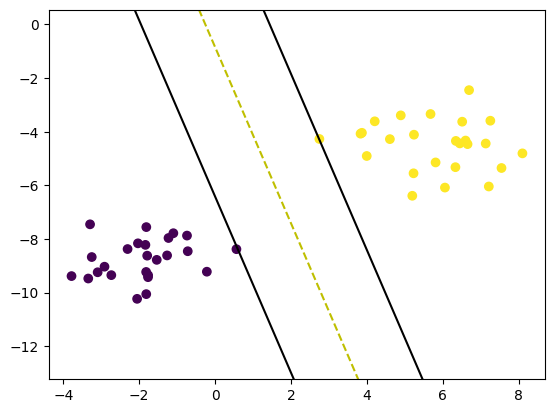

----------------------------------------
Sample input and predicted outcomes:
Sample input: [ 7.12731332 -4.4394424 ]
Predicted outcome: [1.]
----------------------------------------
Sample input: [ 6.68873898 -2.44840134]
Predicted outcome: [1.]
----------------------------------------
Sample input: [-1.1004791  -7.78436803]
Predicted outcome: [-1.]
----------------------------------------
Sample input: [ 3.99337867 -4.90451269]
Predicted outcome: [1.]
----------------------------------------
Sample input: [-1.8171622  -9.22909875]
Predicted outcome: [-1.]
----------------------------------------


In [21]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    import matplotlib.pyplot as plt

    X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )
    y = np.where(y == 0, -1, 1)

    clf = SVM()
    clf.fit(X, y)

    print(clf.w, clf.b)

    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

    visualize_svm()
    print("----------------------------------------")
    print("Sample input and predicted outcomes:")
    for i in range(5):  # Print predictions for first 5 samples
        print("Sample input:", X[i])
        print("Predicted outcome:", clf.predict([X[i]]))
        print("----------------------------------------")


<mark>**Naive Bayes**</mark>

**Abstract:**
Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem with strong independence assumptions between features. In this section, we explore how to implement Naive Bayes in Python, offering a simple yet effective approach to text classification and other classification tasks.

**How to do it:**
1. Preprocess the text data by tokenizing and converting into numerical features.
2. Calculate the likelihood and prior probabilities from the training data.
3. Compute the posterior probability using Bayes' theorem.
4. Make predictions by selecting the class with the highest posterior probability.
5. Evaluate the model's performance using metrics such as accuracy, precision, and recall.

**Conclusion:**
Naive Bayes offers a fast and simple algorithm for classification tasks, particularly in scenarios with high-dimensional feature spaces such as text classification. By following the outlined steps, you can implement Naive Bayes in Python and leverage its benefits for various classification tasks. Naive Bayes is widely used in spam filtering, sentiment analysis, and document categorization due to its efficiency and effectiveness.



--------------------------------------------------
Sample Input: [-1.18969436 -1.11808378 -0.94159977  0.50150002 -1.22473975  0.72849679
 -0.101836    1.14573172 -1.28687448  0.00287192]
Predictions: 0
--------------------------------------------------


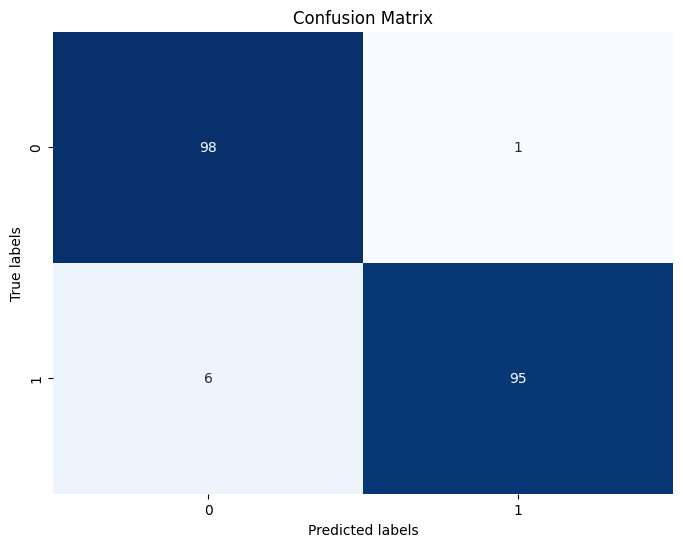

Naive Bayes classification accuracy: 0.965


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

if __name__ == "__main__":
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_classification(
        n_samples=1000, n_features=10, n_classes=2, random_state=123
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    nb = NaiveBayes()
    nb.fit(X_train, y_train)
    predictions = nb.predict(X_test)

    print("-" * 50)
    print("Sample Input:", X_test[0])
    print("Predictions:", predictions[0])
    print("-" * 50)
    
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    print("Naive Bayes classification accuracy:", accuracy(y_test, predictions))


<mark>**K-Nearest Neighbors (KNN)**</mark>

**Abstract:**
K-Nearest Neighbors (KNN) is a simple yet powerful classification algorithm that makes predictions based on the majority class of its k nearest neighbors. In this section, we explore how to implement KNN in Python, offering an intuitive and easy-to-understand approach to classification tasks.

**How to do it:**
1. Preprocess the data and scale the features if necessary.
2. Choose the number of neighbors (k) and distance metric.
3. Calculate distances between the query instance and all training samples.
4. Select the k nearest neighbors based on distances.
5. Assign the class label by majority voting among the k neighbors.
6. Evaluate the model's performance using metrics such as accuracy, precision, and recall.

**Conclusion:**
K-Nearest Neighbors is a versatile algorithm suitable for both classification and regression tasks. By following the outlined steps, you can implement KNN in Python and leverage its simplicity and flexibility for various machine learning tasks. KNN is particularly useful when dealing with non-linear decision boundaries and does not require explicit model training, making it suitable for online learning scenarios.




KNN classification accuracy: 0.7333333333333333


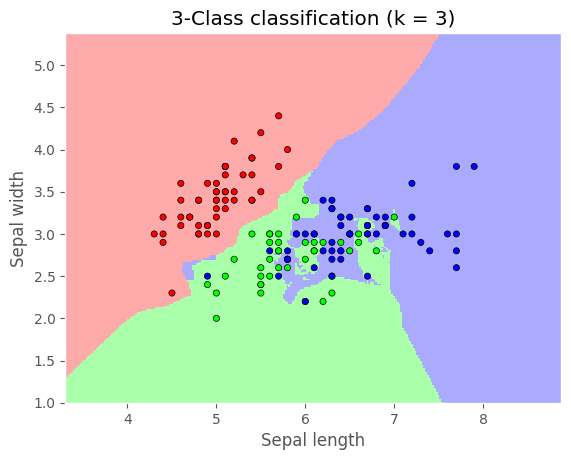


--- Sample Input and Predictions ---
------------------------------
Sample Input: [6.1 3.  4.6 1.4]
Prediction: 2
------------------------------
Sample Input: [6.1 2.9 4.7 1.4]
Prediction: 1
------------------------------
Sample Input: [6.3 2.9 5.6 1.8]
Prediction: 2
------------------------------
Sample Input: [4.6 3.4 1.4 0.3]
Prediction: 0
------------------------------
Sample Input: [5.2 2.7 3.9 1.4]
Prediction: 1
KNN classification accuracy: 0.7333333333333333


In [32]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1[:2] - x2[:2]) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

if __name__ == "__main__":
    cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

    iris = datasets.load_iris()
    X, y = iris.data, iris.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    k = 3
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print("KNN classification accuracy:", accuracy(y_test, predictions))

    # Plotting decision boundary
    h = 0.02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
    cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (k))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.show()

    # Print sample input and predictions
    print("\n--- Sample Input and Predictions ---")
    for i in range(5):
        sample_input = X_test[i]
        prediction = predictions[i]
        print("-" * 30)
        print("Sample Input:", sample_input)
        print("Prediction:", prediction)

if __name__ == "__main__":
    cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

    iris = datasets.load_iris()
    X, y = iris.data[:, :2], iris.target  

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    k = 3
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print("KNN classification accuracy:", accuracy(y_test, predictions))

    h = 0.02  

    cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
    cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()].astype(float))



<mark>**Neural Networks**</mark>

**Abstract:**
Neural Networks are powerful models inspired by the structure and function of the human brain. In this section, we explore how to implement Neural Networks in Python, offering a flexible and scalable approach to solving complex machine learning tasks.

**How to do it:**
1. Preprocess the data and normalize the features if necessary.
2. Design the architecture of the neural network, including the number of layers, neurons, and activation functions.
3. Initialize the weights and biases of the network.
4. Implement forward propagation to compute predictions.
5. Define a loss function to measure the difference between predictions and true labels.
6. Implement backpropagation to compute gradients and update weights using optimization algorithms like Gradient Descent.
7. Train the neural network using training data.
8. Evaluate the model's performance using metrics such as accuracy or Mean Squared Error.

**Conclusion:**
Neural Networks offer a flexible and powerful framework for solving a wide range of machine learning tasks, including classification, regression, and pattern recognition. By following the outlined steps, you can implement Neural Networks in Python and leverage their ability to capture complex relationships in data. Neural Networks have revolutionized many fields, including computer vision, natural language processing, and speech recognition, due to their capability to learn hierarchical representations from data.




Perceptron classification accuracy: 1.0


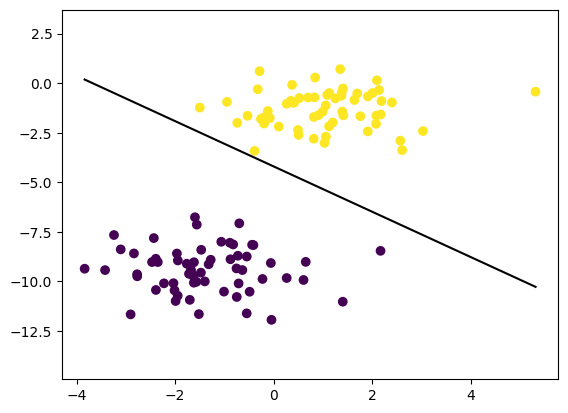


--- Sample Input and Predictions ---
------------------------------
Sample Input: [ 0.61054651 -2.2133306 ]
Prediction: 1
------------------------------
Sample Input: [ -0.11550151 -11.33463898]
Prediction: 0
------------------------------
Sample Input: [-1.13128258 -1.01218094]
Prediction: 1
------------------------------
Sample Input: [ 0.66177169 -2.71105436]
Prediction: 1
------------------------------
Sample Input: [ -1.23648559 -10.65529708]
Prediction: 0


In [26]:
import numpy as np


class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


if __name__ == "__main__":

    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_blobs(
        n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)

    print("Perceptron classification accuracy:", accuracy(y_test, predictions))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()

    print("\n--- Sample Input and Predictions ---")
    for i in range(5):
        sample_input = X_test[i]
        prediction = predictions[i]
        print("-" * 30)
        print("Sample Input:", sample_input)
        print("Prediction:", prediction)


<mark>**Convolutional Neural Networks (CNN) for Digit Classification**</mark>

**Abstract:**
Convolutional Neural Networks (CNNs) are specialized deep learning models designed to effectively handle spatial data, such as images. In this section, we explore how to implement CNNs in Python specifically for the task of digit classification, offering a robust and efficient approach to recognizing handwritten digits.

**How to do it:**
1. Preprocess the image data by normalizing pixel values to a range between 0 and 1.
2. Design the architecture of the CNN, typically consisting of convolutional layers, pooling layers, and fully connected layers.
3. Configure the input layer to accept grayscale images of fixed dimensions (e.g., 28x28 pixels for MNIST dataset).
4. Add convolutional layers to extract features from input images, applying filters to detect patterns.
5. Apply activation functions (e.g., ReLU) to introduce non-linearity and improve model expressiveness.
6. Add pooling layers (e.g., MaxPooling) to reduce spatial dimensions and extract dominant features.
7. Flatten the feature maps to a one-dimensional vector to feed into fully connected layers.
8. Add fully connected layers to perform classification based on extracted features.
9. Compile the model with appropriate loss function (e.g., categorical cross-entropy) and optimizer (e.g., Adam).
10. Train the CNN using labeled digit images, adjusting model parameters through backpropagation.
11. Evaluate the trained model's performance using accuracy metrics on a separate test dataset.

**Conclusion:**
Convolutional Neural Networks (CNNs) have demonstrated remarkable success in digit classification tasks, achieving state-of-the-art performance on benchmark datasets like MNIST and SVHN. By following the outlined steps, you can implement a CNN in Python tailored for digit classification tasks, leveraging its ability to automatically learn hierarchical features from pixel-level data. CNNs have significantly advanced computer vision applications, including handwritten digit recognition, object detection, and image segmentation.



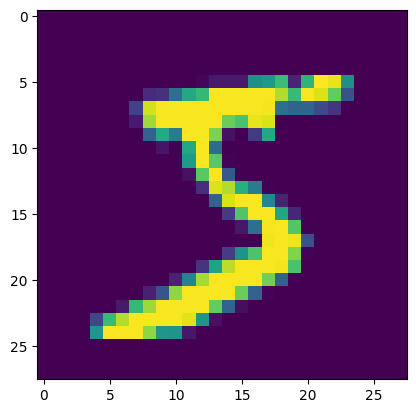

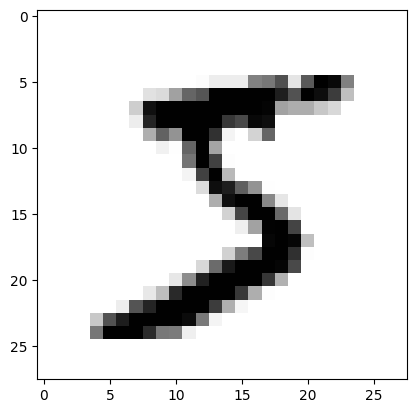

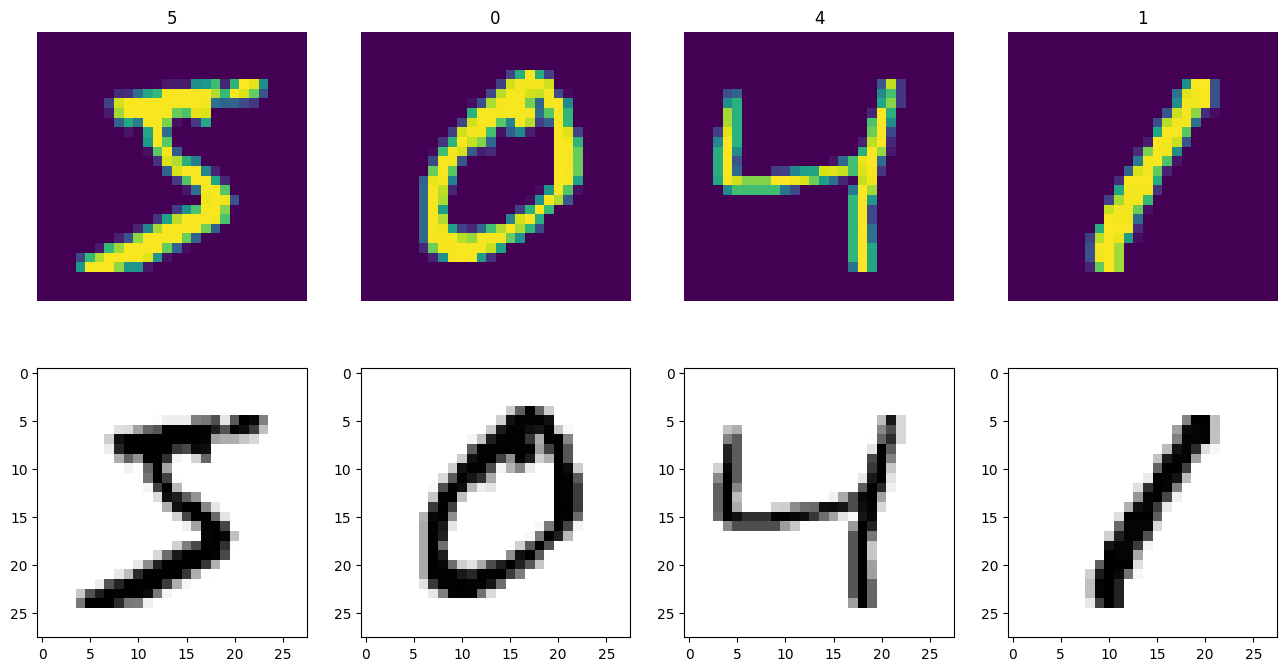

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

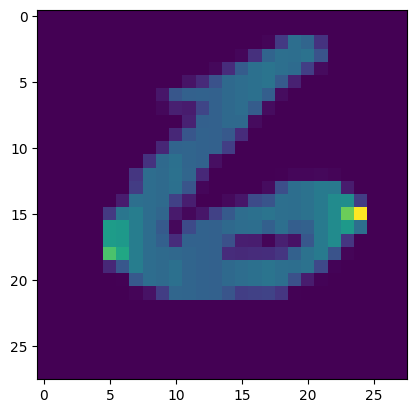

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
xtrain.shape

plt.imshow(xtrain[0])
plt.show()
plt.imshow(xtrain[0], cmap=plt.cm.binary)

import matplotlib.pyplot as plt

def imgshow(i):
    plt.figure(figsize=(16, 8))  

    plt.subplot(2, 4, 1)
    plt.imshow(xtrain[i])
    plt.title(ytrain[i])
    plt.axis('off')

    plt.subplot(2, 4, 2)
    plt.imshow(xtrain[i + 1])
    plt.title(ytrain[i + 1])
    plt.axis('off')

    plt.subplot(2, 4, 3)
    plt.imshow(xtrain[i + 2])
    plt.title(ytrain[i + 2])
    plt.axis('off')

    plt.subplot(2, 4, 4)
    plt.imshow(xtrain[i + 3])
    plt.title(ytrain[i + 3])
    plt.axis('off')

    plt.subplot(2, 4, 5)
    plt.imshow(xtrain[i], cmap=plt.cm.binary)

    plt.subplot(2, 4, 6)
    plt.imshow(xtrain[i + 1], cmap=plt.cm.binary)

    plt.subplot(2, 4, 7)
    plt.imshow(xtrain[i + 2], cmap=plt.cm.binary)

    plt.subplot(2, 4, 8)
    plt.imshow(xtrain[i + 3], cmap=plt.cm.binary)

    plt.show()

imgshow(0)

print(xtrain[0])

xtrain = tf.keras.utils.normalize (xtrain, axis = 1)
xtest = tf.keras.utils.normalize(xtest, axis=1)
plt.imshow(xtrain[0], cmap = plt.cm.binary)

print(xtrain[0])

print(ytrain[0])
import numpy as np
IMG_SIZE=28
xtrain=np.array(xtrain).reshape(-1,IMG_SIZE,IMG_SIZE,1)
xtest=np.array(xtest).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training Samples dimensions",xtrain.shape)
print("Testing Smaples dimensions",xtest.shape)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = xtrain.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()

model.compile(loss ="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(xtrain,ytrain,epochs=5, validation_split=0.3)
test_loss, test_acc = model.evaluate(xtest, ytest)
print("Test Loss on 10,000 test samples",test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)
predictions=model.predict([xtest])
print(predictions)
print("==================================================")
plt.imshow(xtest[-1])
print("Predicted: ",np.argmax(predictions[-1]))
print("==================================================")

<div style="background-color:yellow">
<h1 style="font-size:30px; font-weight:bold; text-align:center;">Clustering</h1>
</div>


<mark>**K-Means Clustering**</mark>

**Abstract:**
K-Means Clustering is a popular unsupervised learning algorithm used for clustering data into groups or clusters based on similarity. In this section, we explore how to implement K-Means Clustering in Python, offering an efficient and scalable approach to clustering analysis.

**How to do it:**
1. Preprocess the data and scale the features if necessary.
2. Choose the number of clusters (k) to partition the data into.
3. Initialize the centroids randomly or using a heuristic.
4. Assign each data point to the nearest centroid based on distance metrics such as Euclidean distance.
5. Update the centroids by computing the mean of all data points assigned to each cluster.
6. Repeat steps 4 and 5 until convergence or a predefined number of iterations.
7. Visualize the clusters to interpret the results.

**Conclusion:**
K-Means Clustering is a versatile algorithm widely used for clustering analysis in various fields, including image segmentation, customer segmentation, and anomaly detection. By following the outlined steps, you can implement K-Means Clustering in Python and gain insights into the underlying structure of your data. K-Means Clustering offers a scalable solution to clustering problems and is suitable for datasets with large numbers of samples.


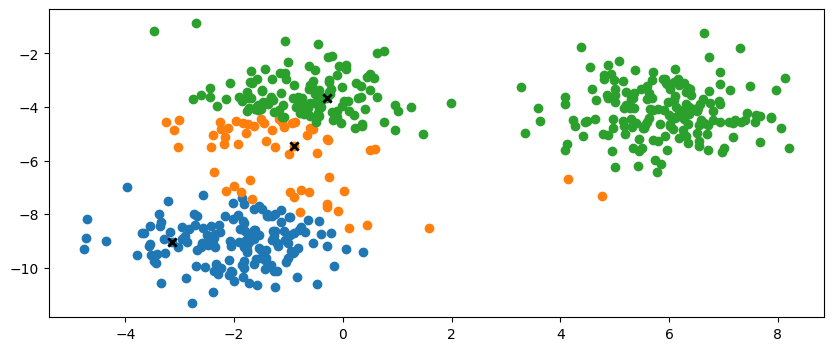

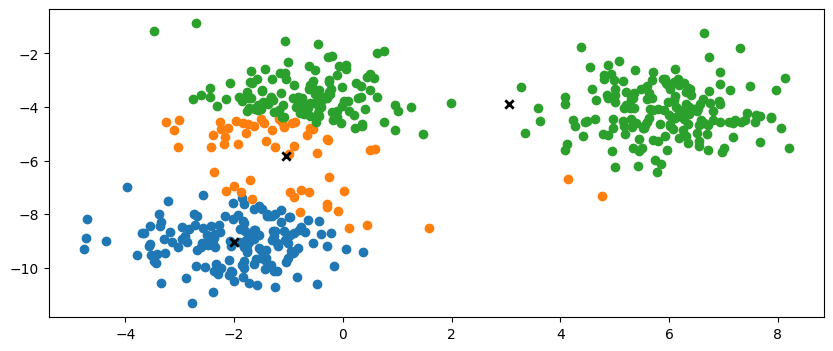

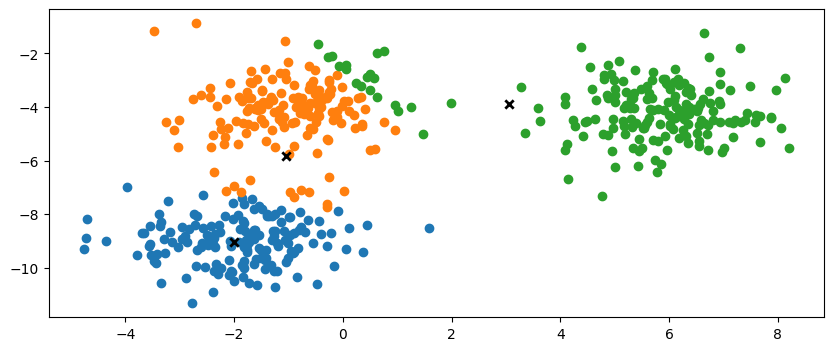

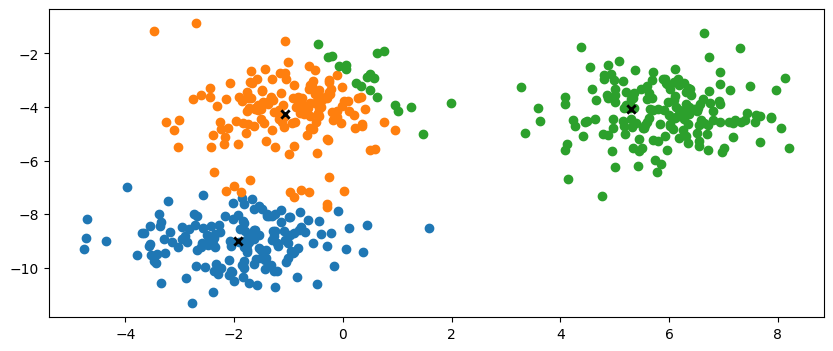

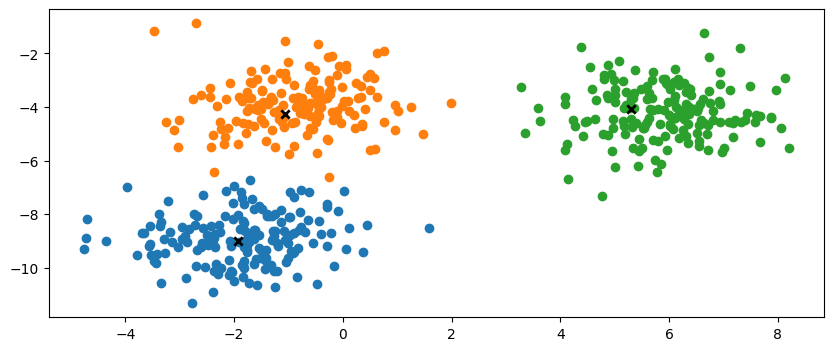

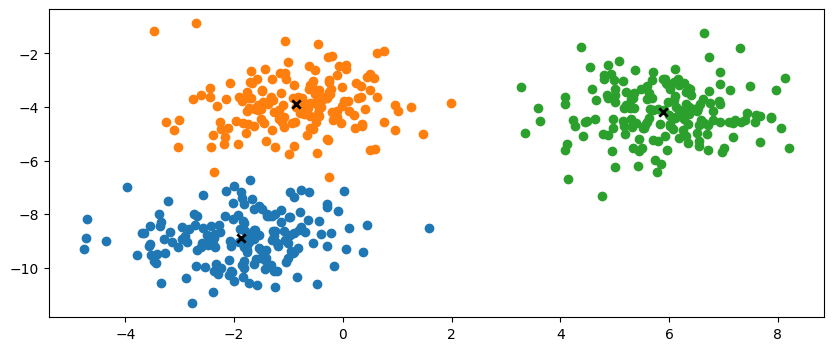

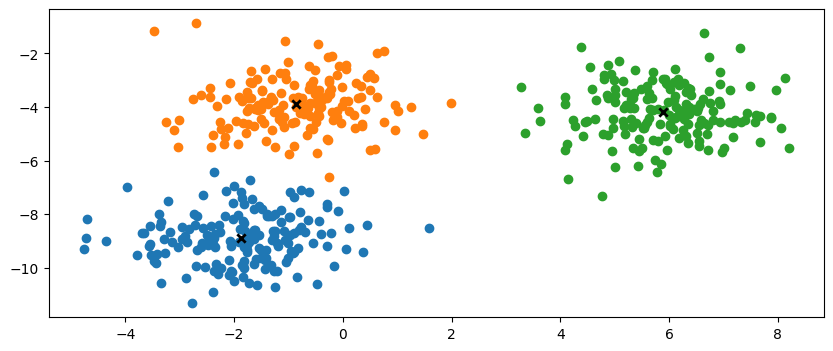

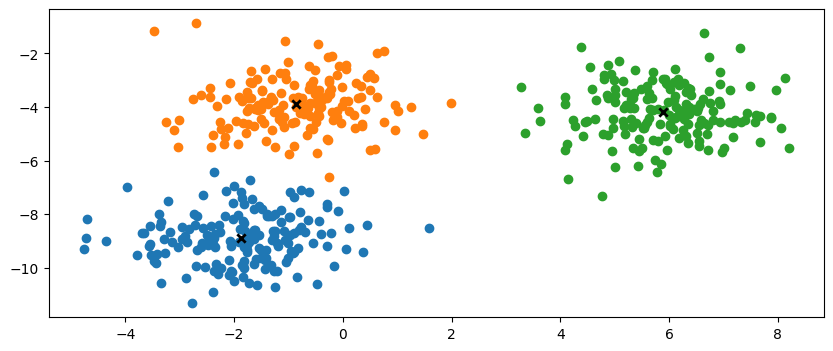

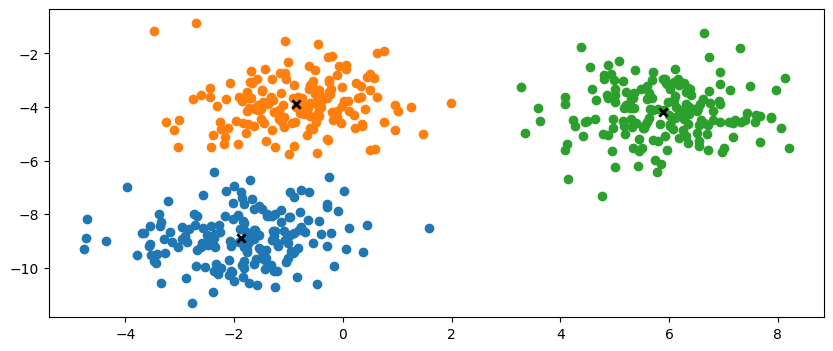

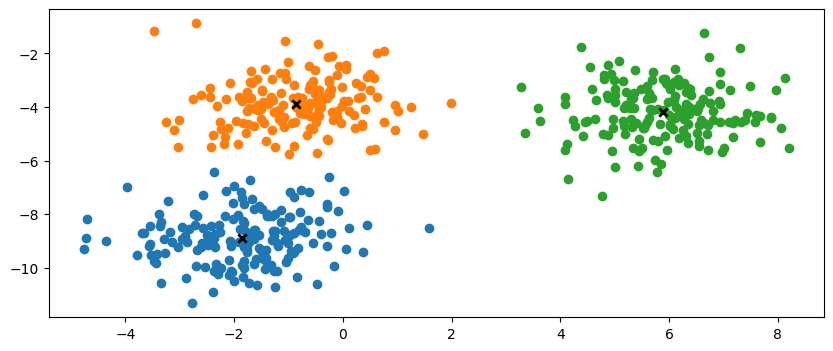

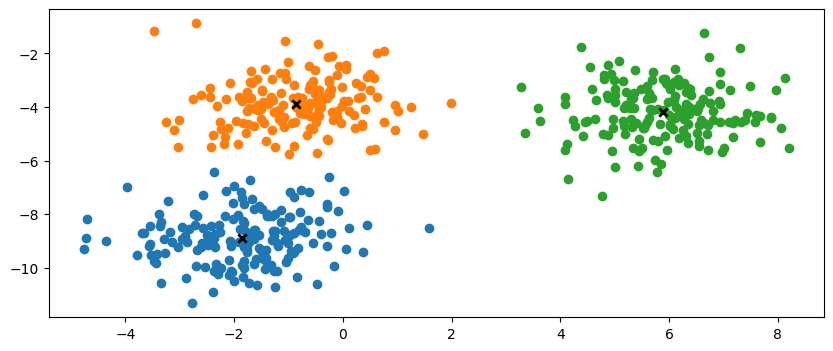

Number of clusters: 3
Silhouette Score: 0.6837082573916827


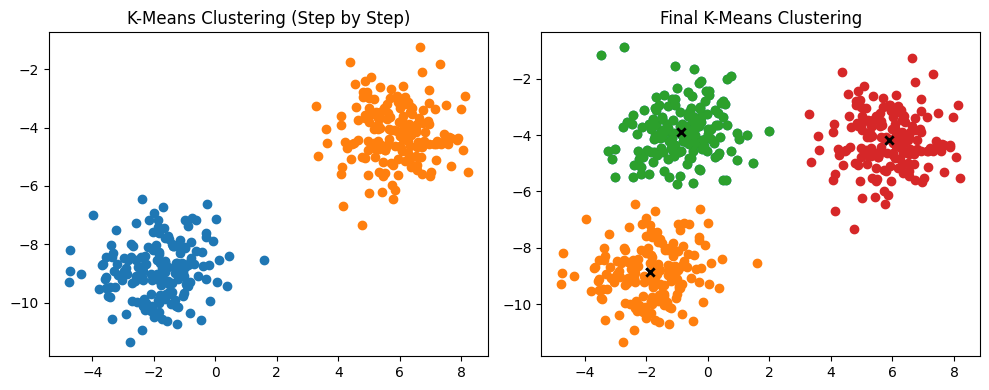

----------------------------------------
Sample Input and Predictions
----------------------------------------
Sample input: [-0.55424442 -9.06938977] --> Predicted cluster: 0
Sample input: [ 5.34932486 -4.03242147] --> Predicted cluster: 2
Sample input: [-0.88618293 -4.56780629] --> Predicted cluster: 1
Sample input: [-0.45298045 -4.2076604 ] --> Predicted cluster: 1
Sample input: [ 7.39487366 -4.5014923 ] --> Predicted cluster: 2
Sample input: [ 4.93592116 -2.76976569] --> Predicted cluster: 2
Sample input: [-2.05851121 -9.2062534 ] --> Predicted cluster: 0
Sample input: [-1.51064356 -9.62585232] --> Predicted cluster: 0
Sample input: [-0.28995859 -7.6085965 ] --> Predicted cluster: 0
Sample input: [-2.02015328 -7.57104614] --> Predicted cluster: 0
----------------------------------------


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

np.random.seed(42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()

            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, axs = plt.subplots(figsize=(10, 4))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            axs.scatter(*point)
        for point in self.centroids:
            axs.scatter(*point, marker="x", color="black", linewidth=2)
        plt.show()


if __name__ == "__main__":
    X, y = make_blobs(
        centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
    )

    clusters = len(np.unique(y))

    k = KMeans(K=clusters, max_iters=150, plot_steps=True)
    y_pred = k.predict(X)
    
    silhouette_avg = silhouette_score(X, y_pred)
    print(f"Number of clusters: {clusters}")
    print(f"Silhouette Score: {silhouette_avg}")

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    for i, index in enumerate(k.clusters):
        point = X[index].T
        axs[i%2].scatter(*point)
    for point in k.centroids:
        axs[1%2].scatter(*point, marker="x", color="black", linewidth=2)
    axs[0].set_title("K-Means Clustering (Step by Step)")

    for i, index in enumerate(k.clusters):
        point = X[index].T
        axs[1].scatter(*point)
    for point in k.centroids:
        axs[1].scatter(*point, marker="x", color="black", linewidth=2)
    axs[1].set_title("Final K-Means Clustering")

    plt.tight_layout()
    plt.show()
    print("-" * 40)
    print("Sample Input and Predictions")
    print("-" * 40)
    for i in range(10):
        print(f"Sample input: {X[i]} --> Predicted cluster: {int(y_pred[i])}")
    print("-" * 40)


<mark>**Hierarchical Clustering Algorithm**</mark>

**Abstract:**
Hierarchical Clustering is an unsupervised learning algorithm that builds a hierarchy of clusters by recursively merging or splitting data points based on similarity. In this section, we explore how to implement Hierarchical Clustering in Python, offering a flexible and intuitive approach to clustering analysis.

**How to do it:**
1. Preprocess the data and scale the features if necessary.
2. Choose a linkage criterion to measure the distance between clusters (e.g., single linkage, complete linkage, average linkage).
3. Calculate the pairwise distance or similarity matrix between data points.
4. Initialize each data point as a singleton cluster.
5. Merge or split clusters based on the chosen linkage criterion until a single cluster or a predefined number of clusters is obtained.
6. Visualize the dendrogram to interpret the hierarchical structure of clusters.

**Conclusion:**
Hierarchical Clustering offers a versatile and interpretable approach to clustering analysis, allowing for the exploration of hierarchical relationships within the data. By following the outlined steps, you can implement Hierarchical Clustering in Python and gain insights into the natural grouping of your data. Hierarchical Clustering is particularly useful when the underlying structure of the data is hierarchical or when the number of clusters is unknown.




Custom Hierarchical Clustering Accuracy: 0.08057627672589314
Sklearn Hierarchical Clustering Accuracy: 0.08057627672589314
--------------------------------------------------
Sample Input:
[[ 0.91000174 -0.19014987]
 [ 0.90396899 -0.38306902]
 [ 0.97747198  1.088577  ]
 [ 1.02643737 -0.84452492]
 [-1.26307358 -0.46367759]
 [-0.86401118  1.52695704]
 [-1.41216754 -0.4050891 ]
 [ 1.08143415 -1.38372146]
 [ 1.19314544  0.87761568]
 [ 1.10392613 -1.49398925]]
--------------------------------------------------
Custom Hierarchical Clustering Predictions:
[2. 2. 2. 2. 1. 1. 1. 2. 2. 2.]
--------------------------------------------------
Sklearn Hierarchical Clustering Predictions:
[0 0 0 0 2 2 2 0 0 0]
--------------------------------------------------


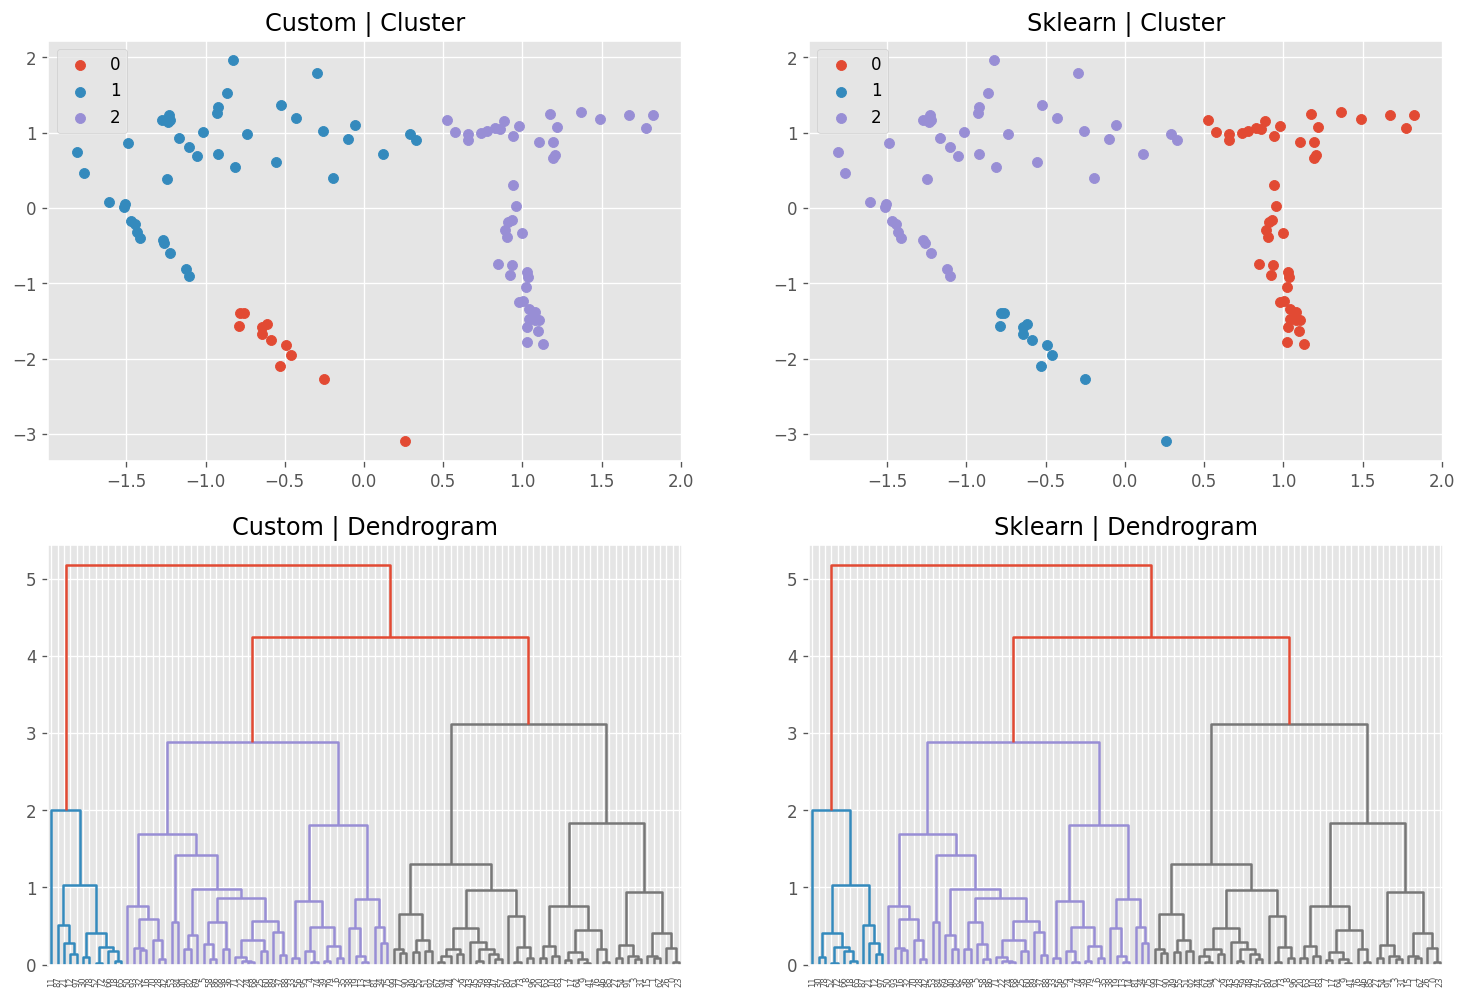

In [31]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
plt.style.use('ggplot')

X, y = make_classification(100, n_features=2, n_redundant=0)


class HC:
    def __init__(self, verbose=False, linkage_type='complete'):
        self.verbose = verbose
        self.linkage_type = linkage_type

    def argmin(self, D):

        minx, miny = (0, 0)
        min_val = 10e5
        for i in range(D.shape[0]):
            for j in range(D.shape[0]):
                if j == i:
                    continue
                else:
                    if D[i, j] < min_val:
                        min_val = D[i, j]
                        minx = i
                        miny = j

        return min_val, minx, miny

    def cluster_distance(self, cluster_members):

        nClusters = len(cluster_members)
        keys = list(cluster_members.keys())
        Distance = np.zeros((nClusters, nClusters))
        for i in range(nClusters):
            ith_elems = cluster_members[keys[i]]
            for j in range(nClusters):
                jth_elems = cluster_members[keys[j]]
                d_in_clusters = euclidean_distances(X[ith_elems], X[jth_elems])
                if self.linkage_type == 'complete':
                    dij = np.max(d_in_clusters)
                elif self.linkage_type == 'single':
                    dij = np.min(d_in_clusters)
                Distance[i, j] = dij

        return Distance

    def fit(self, X):

        self.nSamples = X.shape[0]

        cluster_members = dict([(i, [i]) for i in range(self.nSamples)])
        Z = np.zeros((self.nSamples - 1, 4))  # c1, c2, d, count

        for i in range(0, self.nSamples - 1):
            if self.verbose:
                print(f'\n-------\nDebug Line at, i={i}\n--------')

            nClusters = len(cluster_members)
            keys = list(cluster_members.keys())
            # caculate the distance between existing clusters
            D = self.cluster_distance(cluster_members)
            _, tmpx, tmpy = self.argmin(D)
            if self.verbose:
                print(f'Z:\n{Z}, \nCluster Members: {cluster_members}, D: \n {D}')

            x = keys[tmpx]
            y = keys[tmpy]
            # update Z
            Z[i, 0] = x
            Z[i, 1] = y
            Z[i, 2] = D[tmpx, tmpy]  # that's where the min value is
            Z[i, 3] = len(cluster_members[x]) + len(cluster_members[y])

            # new cluster created
            cluster_members[i + self.nSamples] = cluster_members[x] + cluster_members[y]
            # remove merged from clusters pool, else they'll be recalculated
            del cluster_members[x]
            del cluster_members[y]

        self.Z = Z
        return self.Z

    def predict(self, n_cluster=3):

        labels = np.zeros((self.nSamples))
        cluster_members = dict([(i, [i]) for i in range(self.nSamples)])
        for i in range(self.nSamples - n_cluster):
            x, y = (Z[i, 0], Z[i, 1])
            cluster_members[self.nSamples + i] = cluster_members[x] + cluster_members[y]
            del cluster_members[x]
            del cluster_members[y]

        keys = list(cluster_members.keys())

        for i in range(len(keys)):
            samples_in_cluster = cluster_members[keys[i]]
            labels[samples_in_cluster] = i

        return labels


hc = HC(linkage_type='complete')
Z = hc.fit(X)
myLabel = hc.predict(n_cluster=3)

clustering = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X)
skLabel = clustering.labels_

my_accuracy = adjusted_rand_score(y, myLabel)
sk_accuracy = adjusted_rand_score(y, skLabel)

fig, ax = plt.subplots(2, 2, facecolor='white', figsize=(15, 5 * 2), dpi=120)

for i in range(3):
    myIndices = myLabel == i
    skIndices = skLabel == i
    ax[0, 0].scatter(x=X[myIndices, 0], y=X[myIndices, 1], label=i)
    ax[0, 1].scatter(x=X[skIndices, 0], y=X[skIndices, 1], label=i)

ax[0, 0].set_title('Custom | Cluster')
ax[0, 1].set_title('Sklearn | Cluster')
ax[0, 0].legend()
ax[0, 1].legend()

z = hierarchy.linkage(X, 'complete')  # scipy agglomerative cluster
hierarchy.dendrogram(Z, ax=ax[1, 0])  # plotting mine with their function
hierarchy.dendrogram(z, ax=ax[1, 1])  # plotting their with their function

ax[1, 0].set_title('Custom | Dendrogram')
ax[1, 1].set_title('Sklearn | Dendrogram')

print("Custom Hierarchical Clustering Accuracy:", my_accuracy)
print("Sklearn Hierarchical Clustering Accuracy:", sk_accuracy)

print("-" * 50)
print("Sample Input:")
print(X[:10])
print("-" * 50)
print("Custom Hierarchical Clustering Predictions:")
print(myLabel[:10])
print("-" * 50)
print("Sklearn Hierarchical Clustering Predictions:")
print(skLabel[:10])
print("-" * 50)

plt.show()


<mark>**DBSCAN**</mark>

**Abstract:**
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular density-based clustering algorithm that identifies clusters of arbitrary shapes in data while also detecting outliers as noise. In this section, we explore how to implement DBSCAN in Python, offering a robust and flexible approach to clustering analysis.

**How to do it:**
1. Preprocess the data and scale the features if necessary.
2. Choose the epsilon (ε) and minimum points (MinPts) parameters.
3. Calculate the distance matrix between data points.
4. Identify core points, border points, and noise points based on the epsilon neighborhood and MinPts.
5. Form clusters by connecting core points that are within each other's epsilon neighborhood.
6. Assign border points to the nearest core point's cluster.
7. Classify noise points as outliers.
8. Visualize the clusters and outliers.

**Conclusion:**
DBSCAN is a robust clustering algorithm that can handle complex cluster shapes and noise effectively. By following the outlined steps, you can implement DBSCAN in Python and identify clusters and outliers in your data. DBSCAN is particularly useful in applications where clusters vary in size, shape, and density, such as spatial data analysis and anomaly detection.




{'e': 0.3470000000000002, 'minp': 23}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  2 -1  2  2  2  2 -1  2  2  2  1 -1  1 -1 -1  1  1  2  2 -1
  2 -1  2 -1  2  2 -1  1  2  1  2  2  2  1 -1  2  2  1  1  1  2  2 -1  2
  2  1 -1  1  2  1]
precision_score- 0.9301075268817204
recall_score- 0.82


 C:\Users\akhilesh zende\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


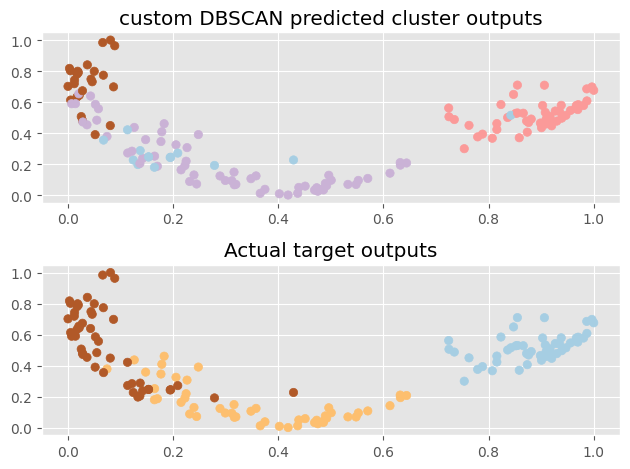

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_iris
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances,f1_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin

class MyClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self,e=0,minp=0):
        self.e =e
        self.minp=minp
        
        
    def fit(self, X,Y):
        self.Y=Y
        DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(X, 'euclidean'))
        core_point_array=np.zeros(150)
        cluster_array=np.zeros(150)
        PointNeighbors=[]
        e=self.e
        k=self.minp
        w=0
        for i in range(len(DistanceMatrix)):
            PointNeighbors=np.where(DistanceMatrix[i]<=e)[0]
            if len(PointNeighbors)>=k:
                core_point_array[i]=1
                if cluster_array[i]==0:
                    cluster_array[i]=w
                    w=w+1
                for x in range(len(PointNeighbors)):
                    if cluster_array[PointNeighbors[x]]==0:
                        cluster_array[PointNeighbors[x]]=cluster_array[i]
        for x in range(len(cluster_array)):
                cluster_array[x]=cluster_array[x]-1
        self.cluster_array=cluster_array
        return cluster_array
       
       
       
    def predict(self, X):
        return self.cluster_array 

    def score(self, X, Y):
        dt=f1_score(self.Y,self.cluster_array,average='weighted')
        return (dt)

        
        
def DBSCAN(normalised_distance,e,k):
    DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(normalised_distance, 'euclidean'))
    core_point_array=np.zeros(150)
    cluster_array=np.zeros(150)
    PointNeighbors=[]
    w=0
    for i in range(len(DistanceMatrix)):
        PointNeighbors=np.where(DistanceMatrix[i]<=e)[0]
        if len(PointNeighbors)>=k:
            core_point_array[i]=1
            if cluster_array[i]==0:
                cluster_array[i]=w
                w=w+1
            for x in range(len(PointNeighbors)):
                if cluster_array[PointNeighbors[x]]==0:
                    cluster_array[PointNeighbors[x]]=cluster_array[i]
    for x in range(len(cluster_array)):
            cluster_array[x]=cluster_array[x]-1    
    return cluster_array

iris = load_iris()
input_data = iris.data
target_data = iris.target

poly = PolynomialFeatures(2)
input_data = poly.fit_transform(input_data)  
input_data = QuantileTransformer(n_quantiles=40, random_state=0).fit_transform(input_data)
scaler = MinMaxScaler()
scaler.fit(input_data)
normalised_input_data = scaler.transform(input_data)
distan = pairwise_distances(normalised_input_data, metric='euclidean')
scaler.fit(distan)
normalised_distance = scaler.transform(distan)
sscaler = StandardScaler()
sscaler.fit(normalised_distance)
normalised_distance = sscaler.transform(normalised_distance)
pca = PCA(n_components=4)
normalised_distance = pca.fit_transform(normalised_distance)
scaler.fit(normalised_distance)
normalised_distance = scaler.transform(normalised_distance)

eps_values = np.arange(0.1, 0.5 ,0.001)
min_sample_values = np.arange(2, 30, 1)
params = {
    'e': eps_values,
    'minp': min_sample_values
}
cv = [(slice(None), slice(None))]
gs = GridSearchCV(MyClassifier(), param_grid=params, cv=cv)
Y = target_data
gs.fit(normalised_distance, Y)
print(gs.best_params_)
para = gs.best_params_

e = para['e']
k = para['minp']
cluster_array = DBSCAN(normalised_distance, e, k)
print(target_data)
print(cluster_array.astype(int))
print('precision_score- '+str(precision_score(target_data,cluster_array,average='weighted',labels=np.unique(cluster_array))))
print('recall_score- '+str(recall_score(target_data,cluster_array,average='weighted',labels=np.unique(cluster_array))))

plt.subplot(2, 1, 1)
plt.scatter(normalised_distance[:,0], normalised_distance[:,1],c=cluster_array, cmap='Paired')
plt.title("custom DBSCAN predicted cluster outputs")

plt.subplot(2, 1, 2)
plt.scatter(normalised_distance[:,0], normalised_distance[:,1],c=target_data, cmap='Paired')
plt.title("Actual target outputs")

plt.tight_layout()
plt.show()
